In [4]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load

In [5]:
hists = load('pods/hists_darkhiggs2018.coffea')
signal_hists = hists['signal']
bkg_hists    = hists['bkg']
data_hists   = hists['data']

In [22]:
exp = 0
region = 'iszeroL'
jet_selection = 'mass1'
data={}
data['iszeroL'] = 'MET'
data['isoneM'] = 'MET'
data['isoneE'] = 'SingleElectron'
data['istwoM'] = 'MET'
data['istwoE'] = 'SingleElectron'
data['isoneA'] = 'SinglePhoton'

print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in bkg_hists['recoil'].identifiers('process'):
    yld = bkg_hists['recoil'].integrate('jet_selection',jet_selection).integrate('region',region).integrate('process', p).values(overflow='all')
    if () in yld:
    #yld = np.sum(bkg_hists['recoil'].integrate('jet_selection',jet_selection).integrate('region',region).integrate('process', p).values(overflow='all')[()])
        exp += np.sum(yld[()])
        print(p, '%.1f' % np.sum(yld[()]))

print('------------------')
for p in signal_hists['recoil'].identifiers('process'):
    yld = signal_hists['recoil'].integrate('jet_selection',jet_selection).integrate('region',region).integrate('process', p).values(overflow='all')
    if () in yld:
        print(p, '%.1f' % np.sum(yld[()]), '| S/B = %.3f' % (np.sum(yld[()])/exp), '| S/sqrt(B) = %.1f' % (np.sum(yld[()])/np.sqrt(exp)))

    
print('------------------')
print('Total expected:', '%.1f' % exp)
yld = data_hists['recoil'].integrate('jet_selection',jet_selection).integrate('region',region).integrate('process', data[region]).values(overflow='all')
if () in yld and 'iszeroL' not in region:
    print('Total observed:', '%.1f' % np.sum(yld[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 4.5
DY 239.5
Diboson 516.6
ST 122.6
TT 368.8
Wjets 19835.3
ZJets 36285.0
------------------
Mhs_50 2659.8 | S/B = 0.046 | S/sqrt(B) = 11.1
Mhs_70 437.9 | S/B = 0.008 | S/sqrt(B) = 1.8
Mhs_90 183.3 | S/B = 0.003 | S/sqrt(B) = 0.8
MonoJet 5277.2 | S/B = 0.092 | S/sqrt(B) = 22.0
MonoW 42.9 | S/B = 0.001 | S/sqrt(B) = 0.2
MonoZ 12.0 | S/B = 0.000 | S/sqrt(B) = 0.1
------------------
Total expected: 57372.3
------------------
------------------



ValueError: plot1d() can only support up to two dimensions (one for axis, one to stack or overlay)

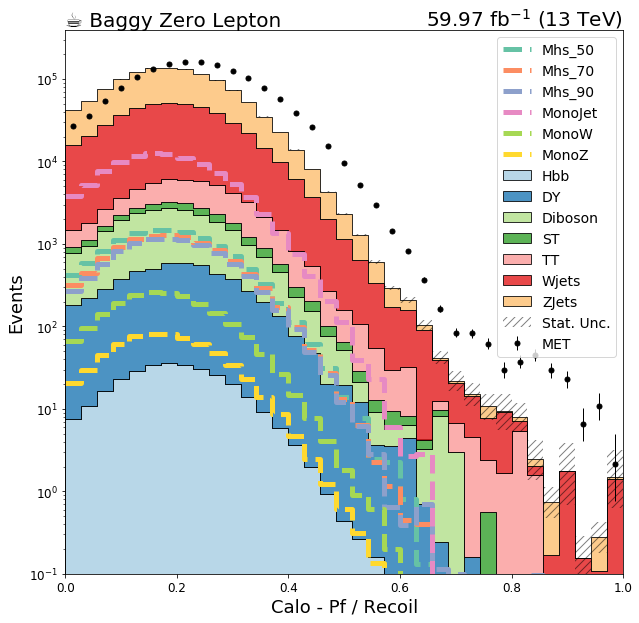

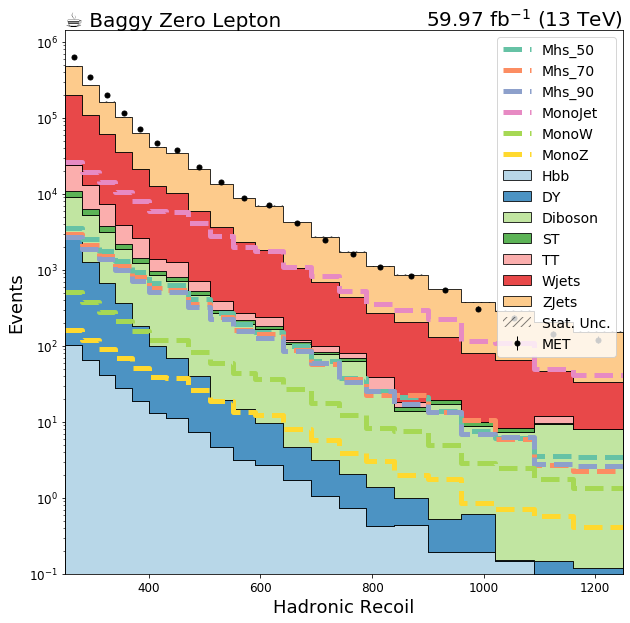

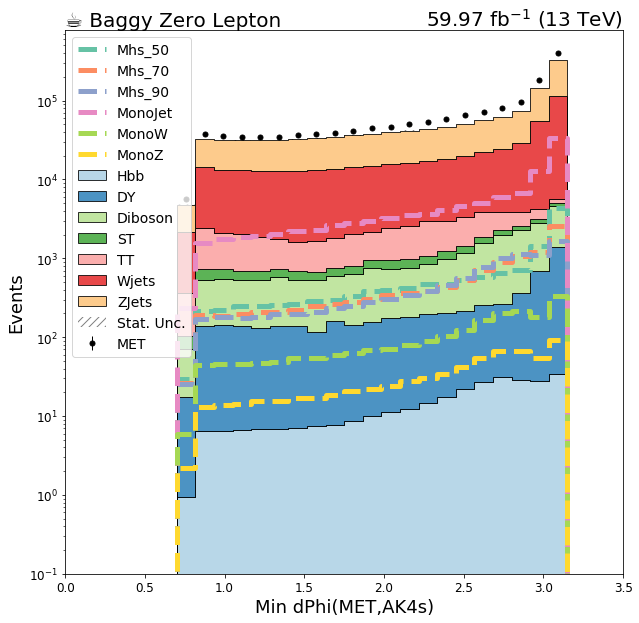

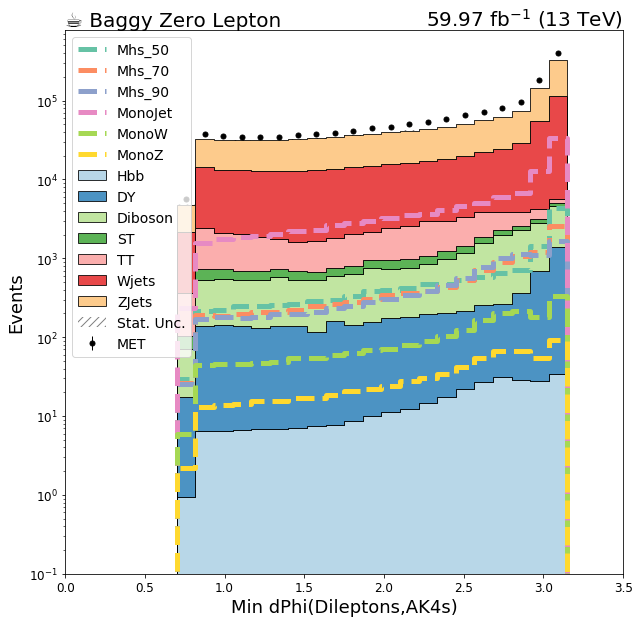

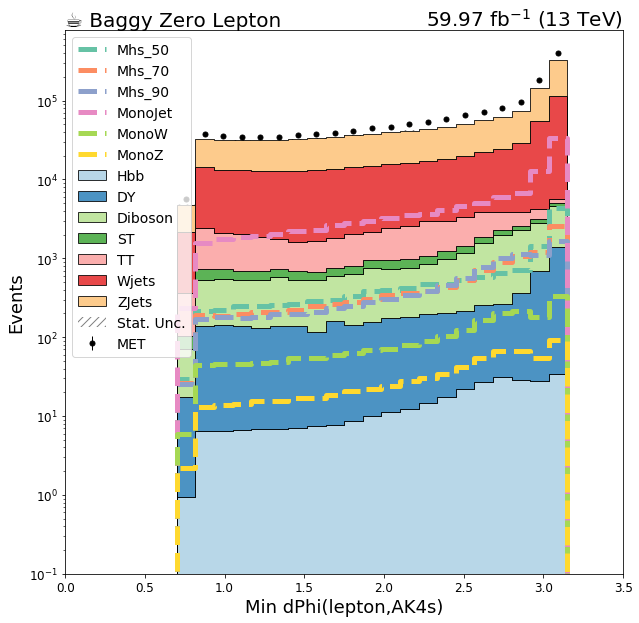

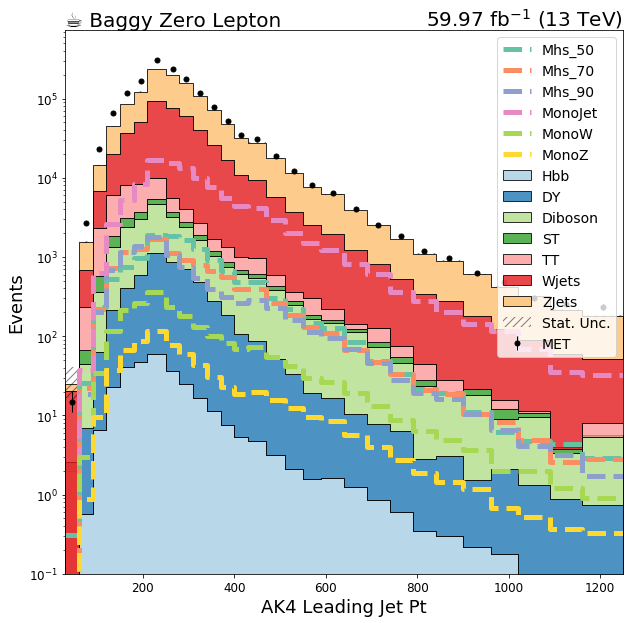

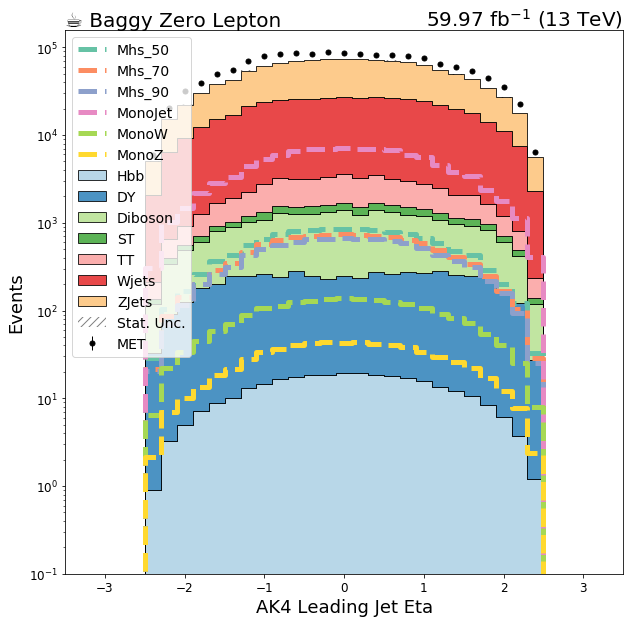

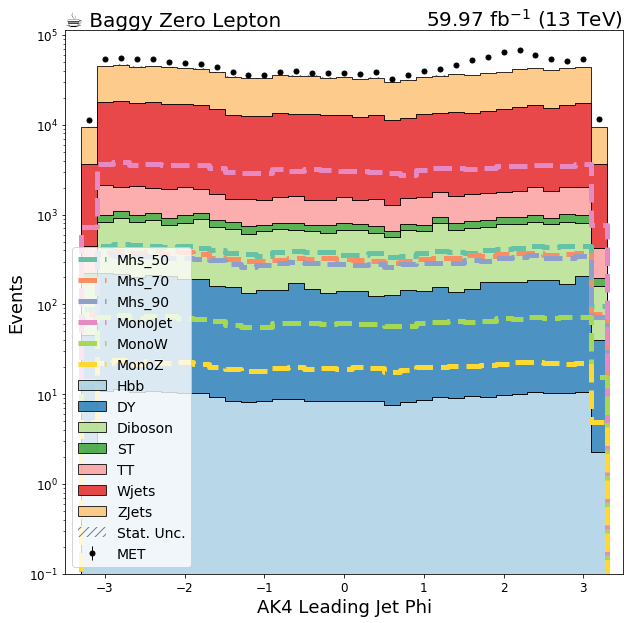

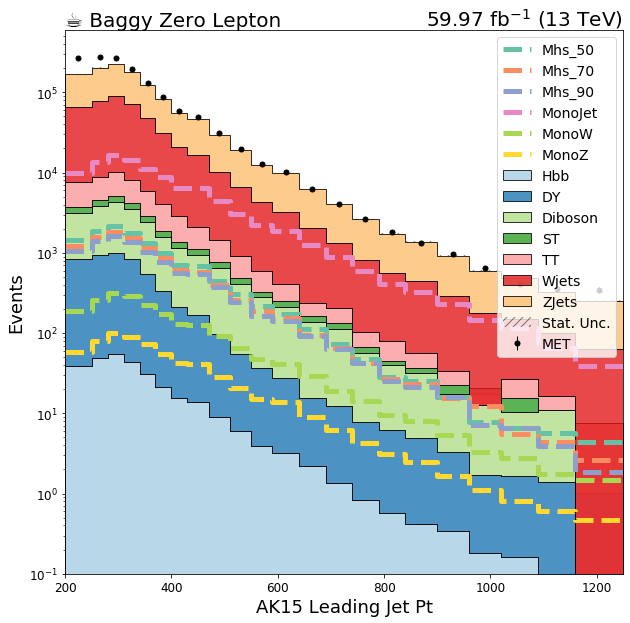

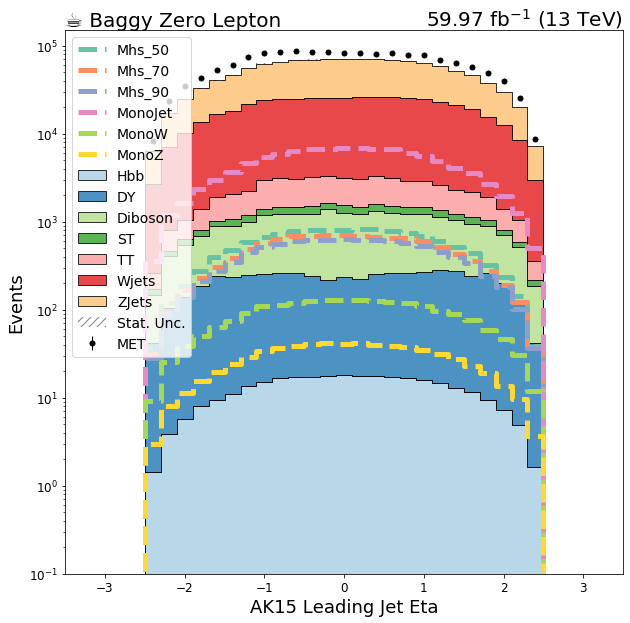

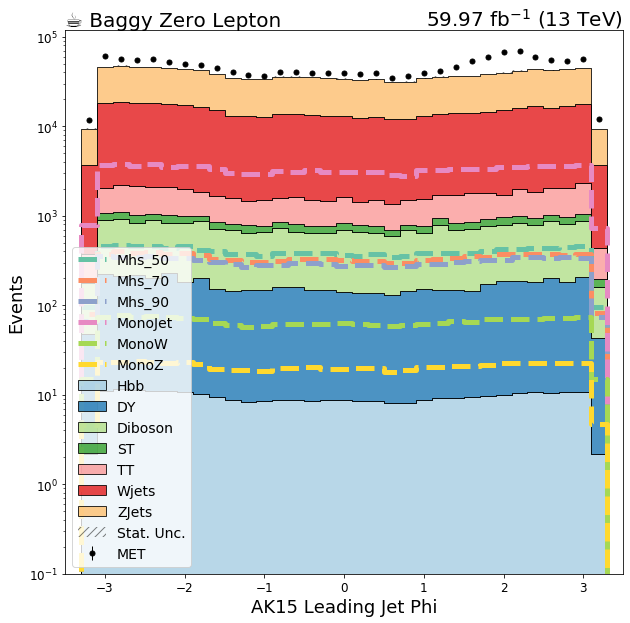

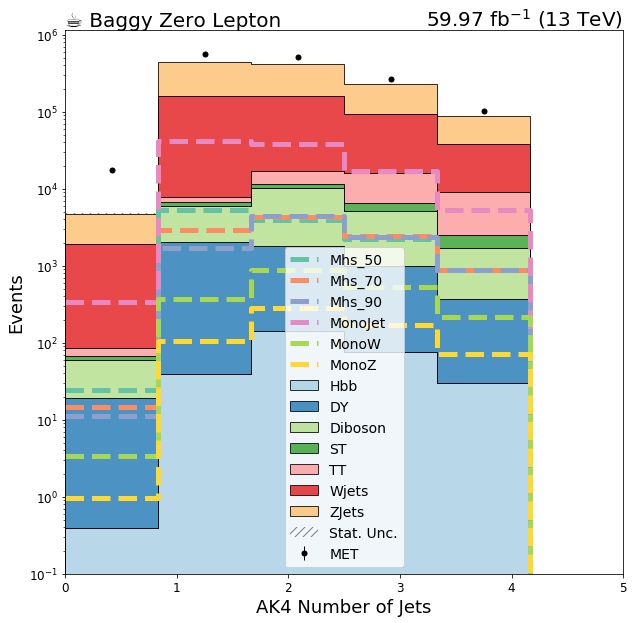

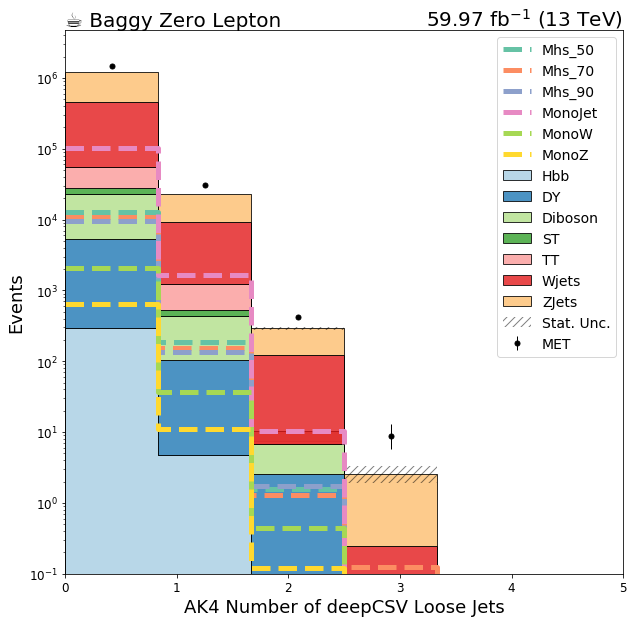

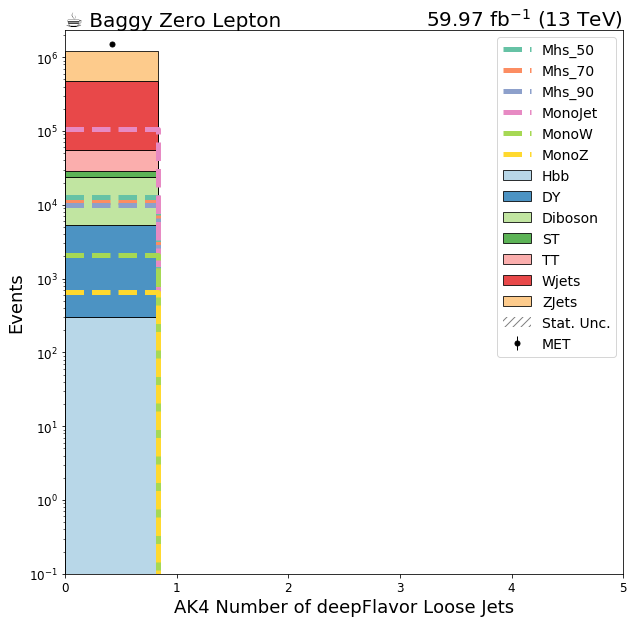

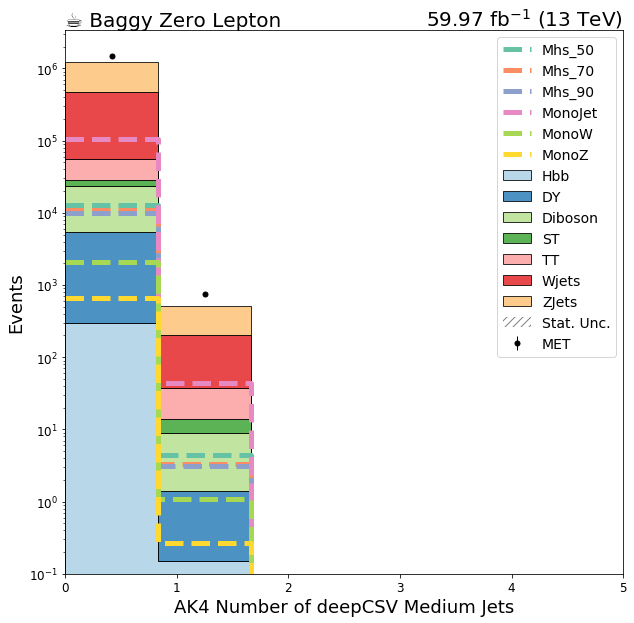

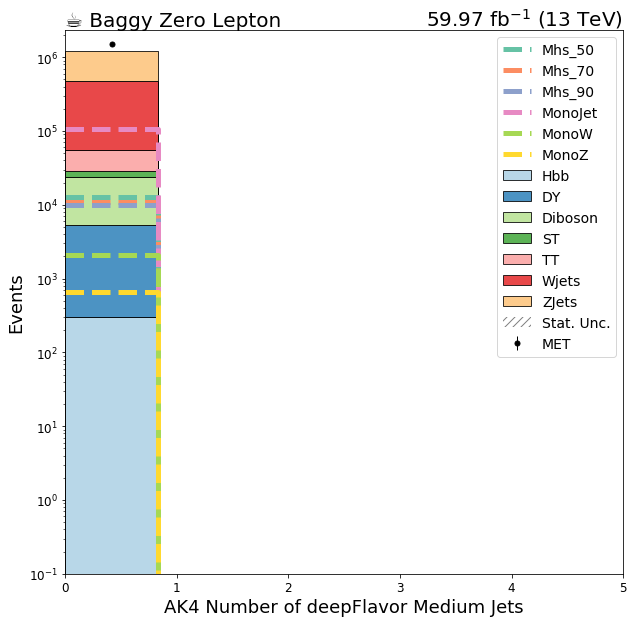

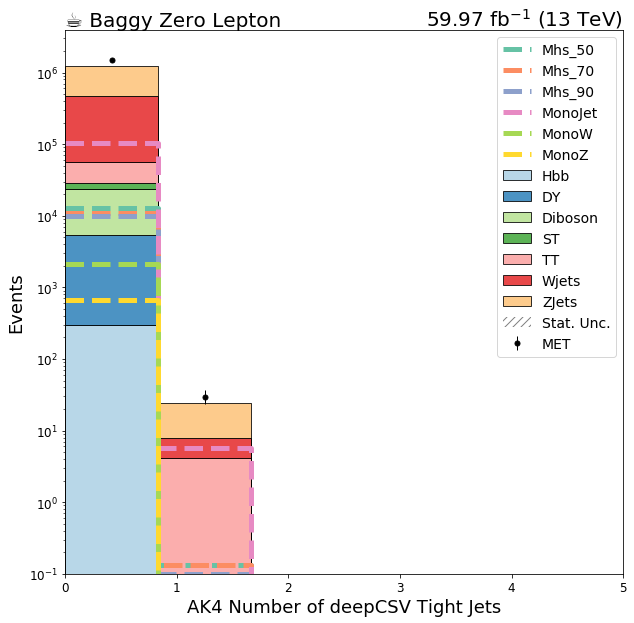

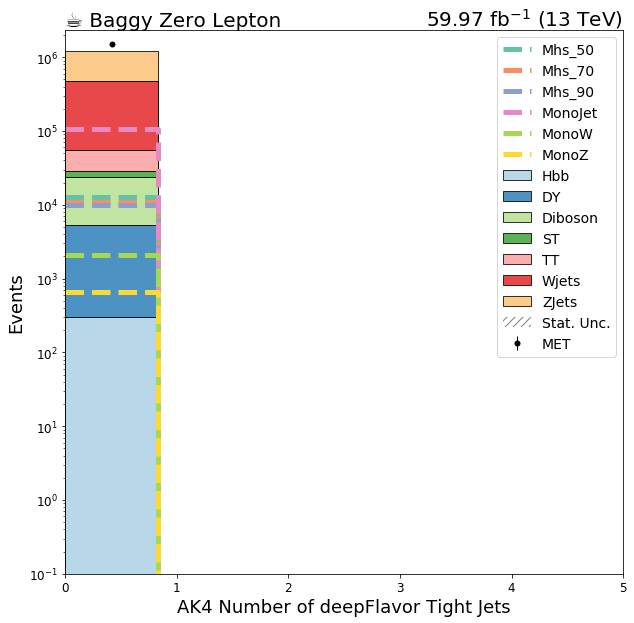

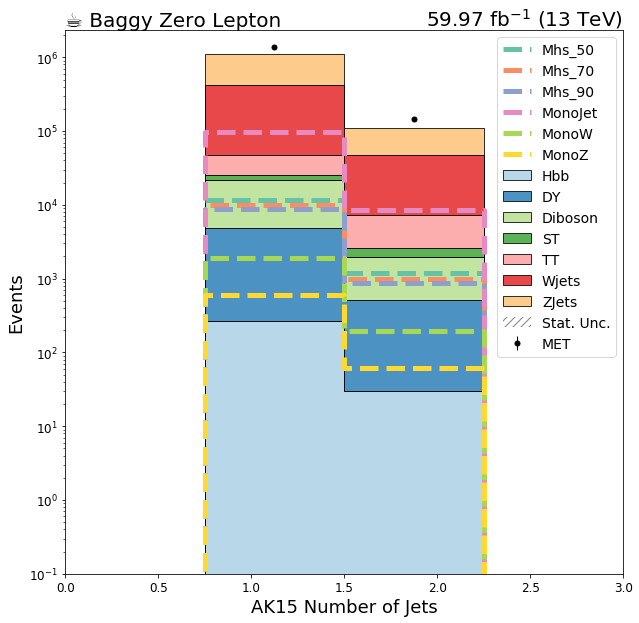

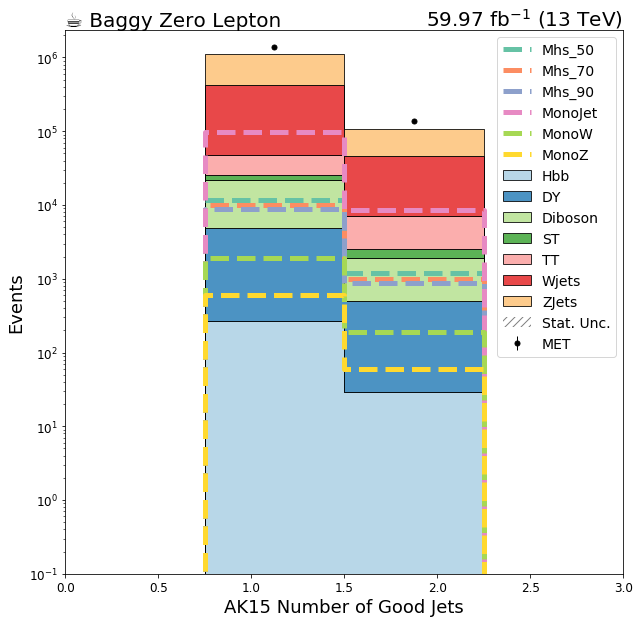

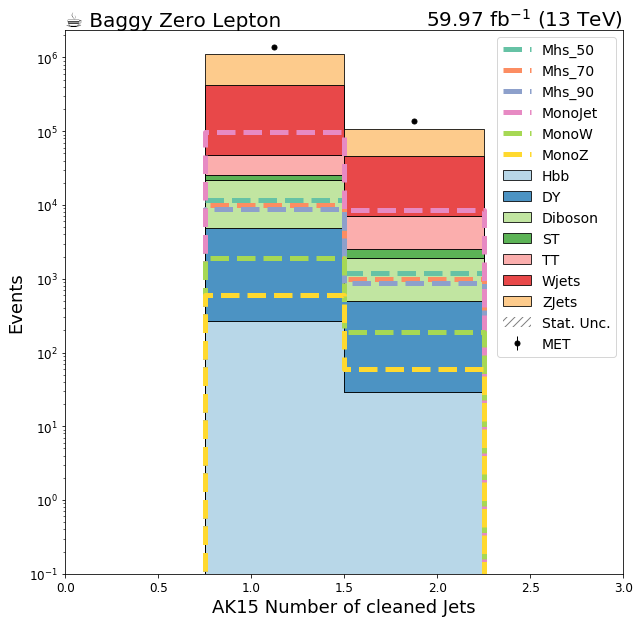

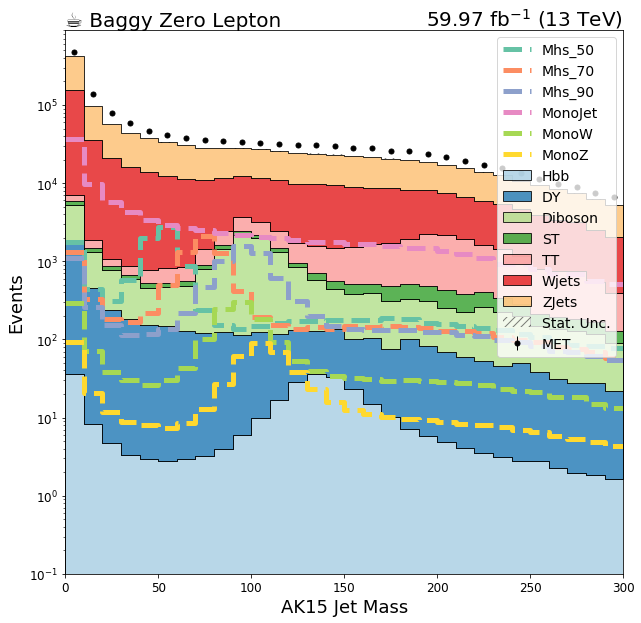

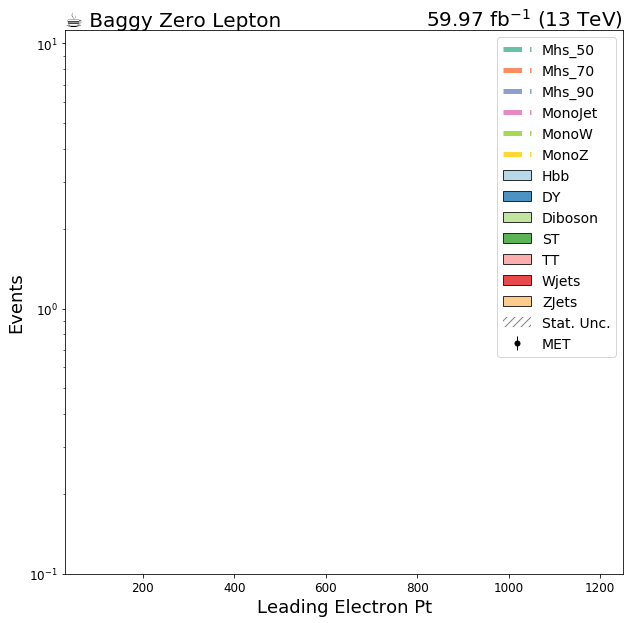

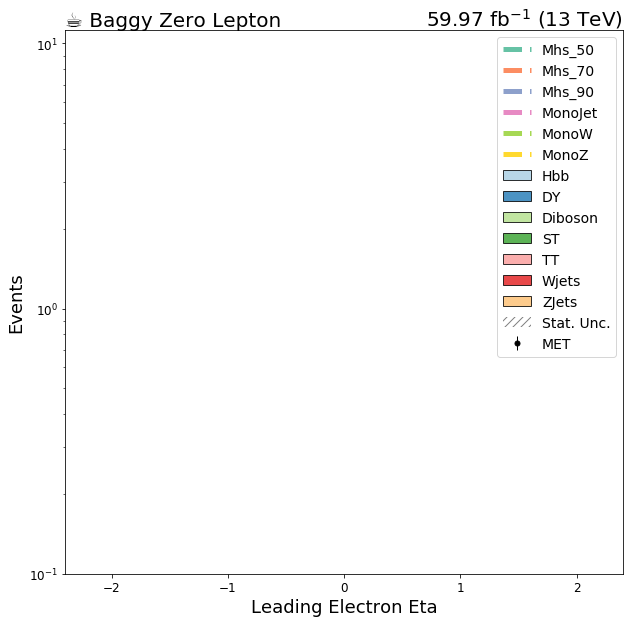

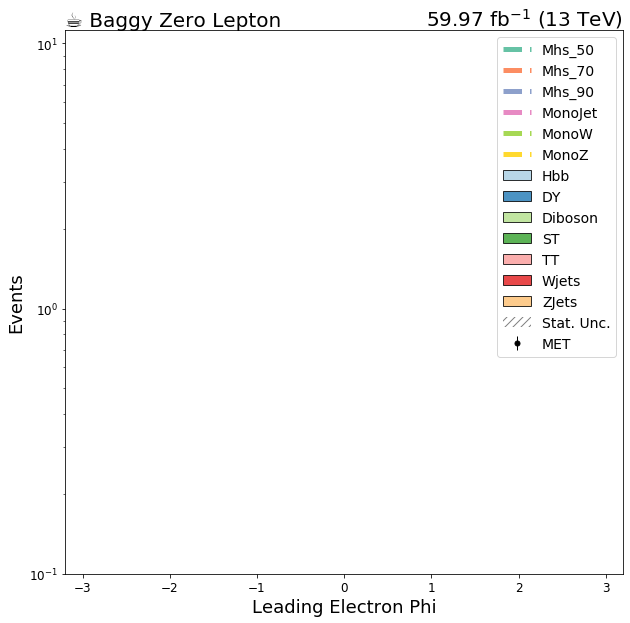

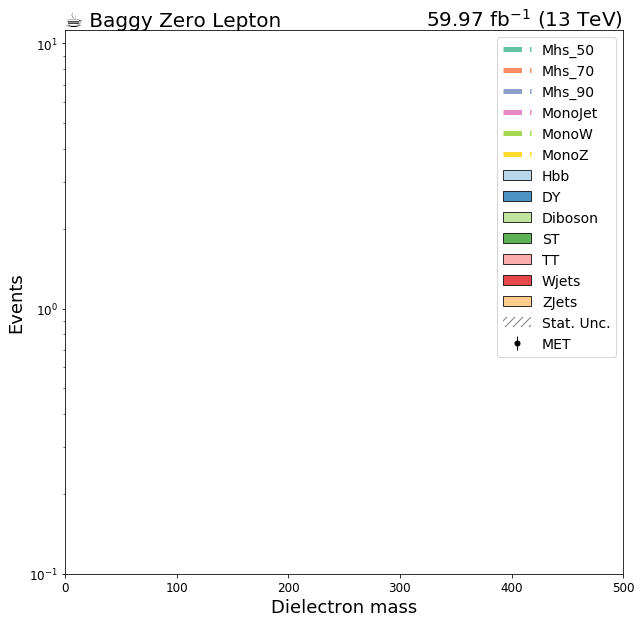

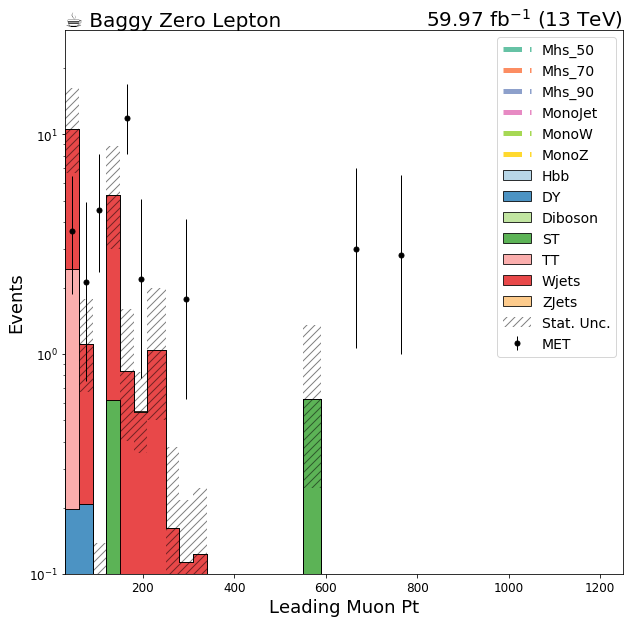

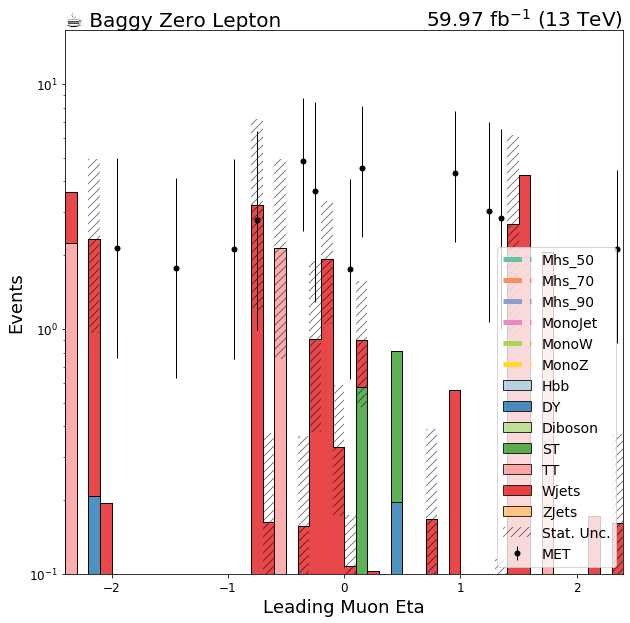

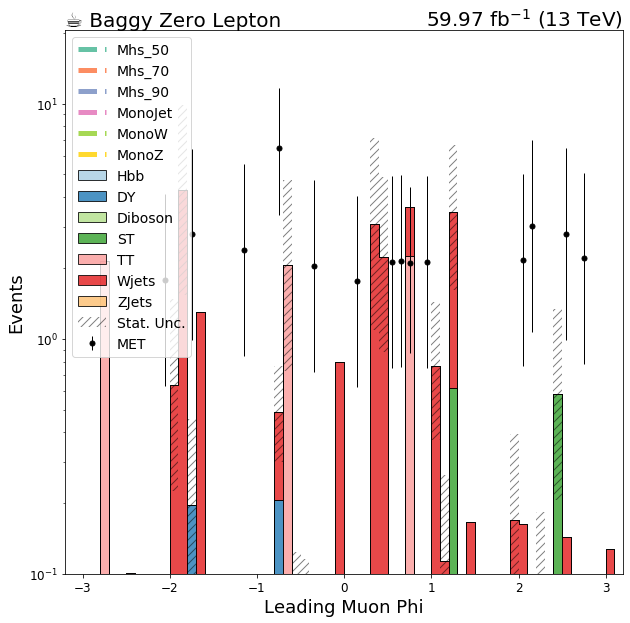

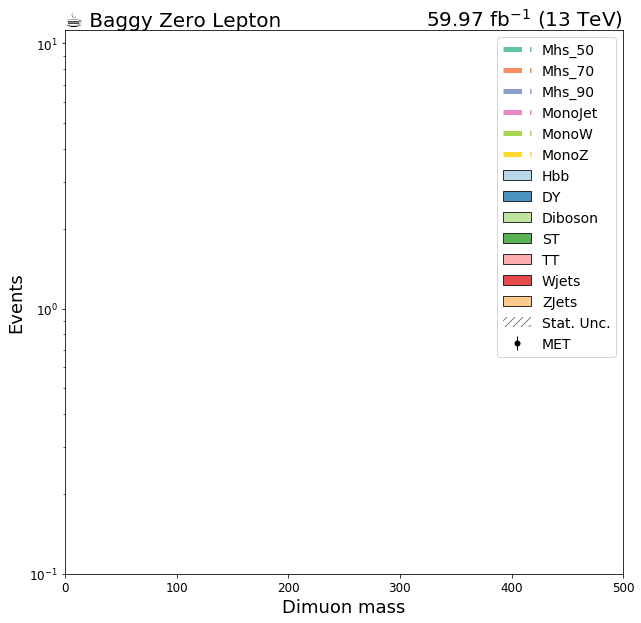

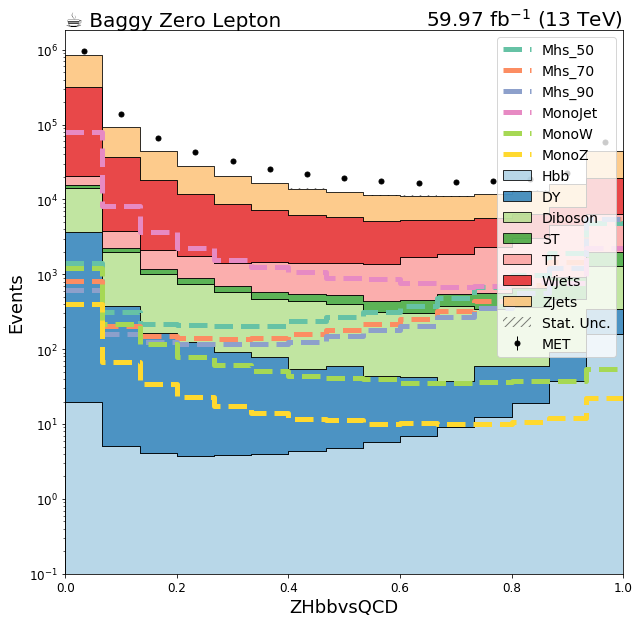

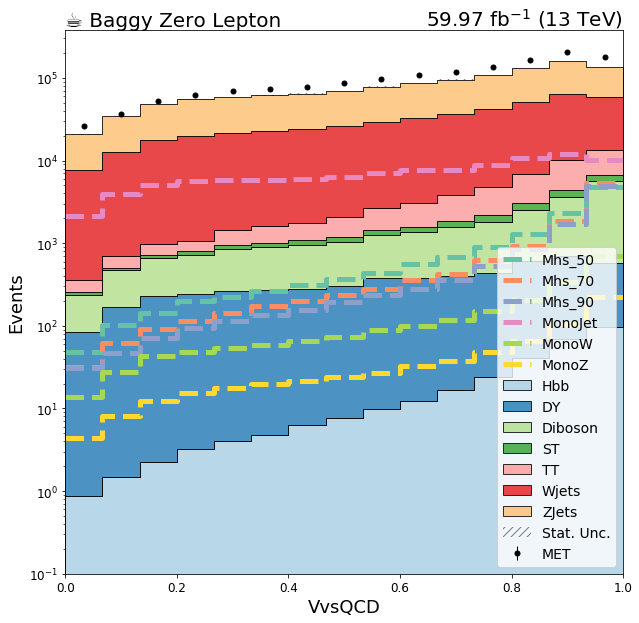

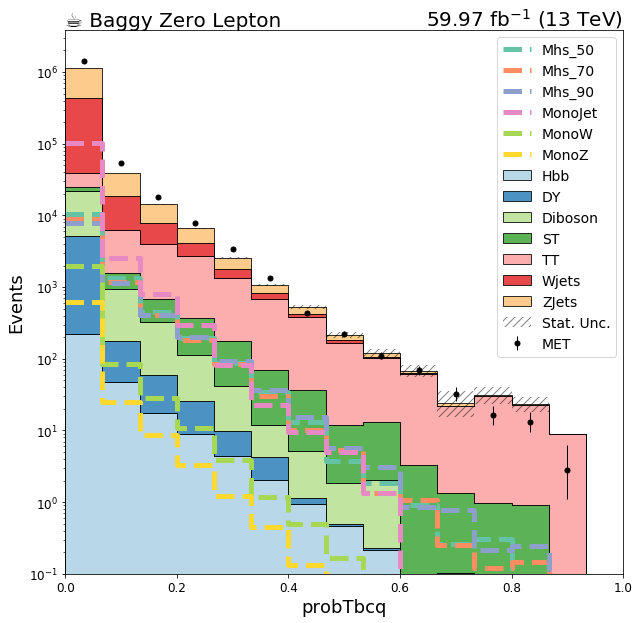

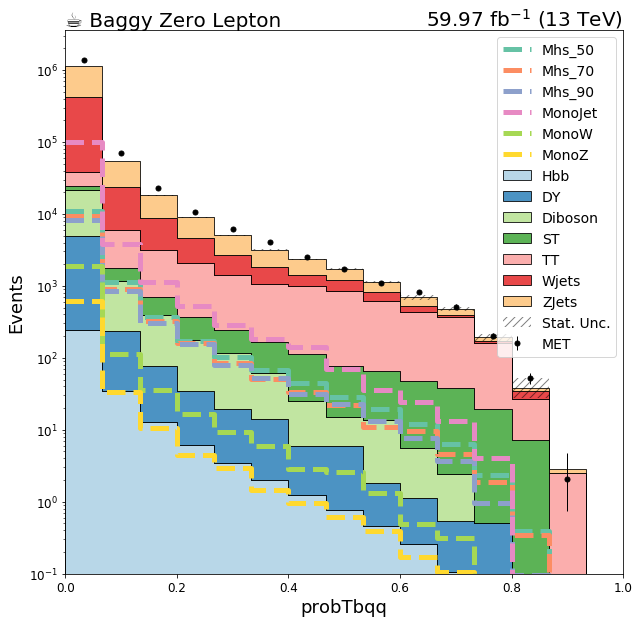

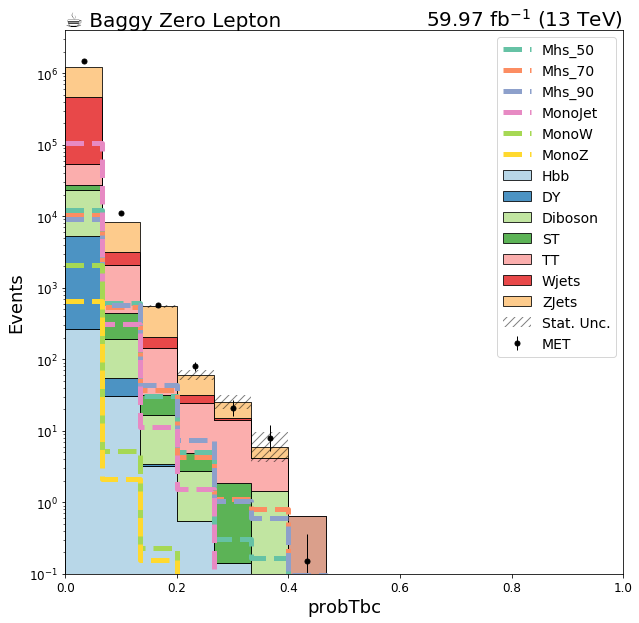

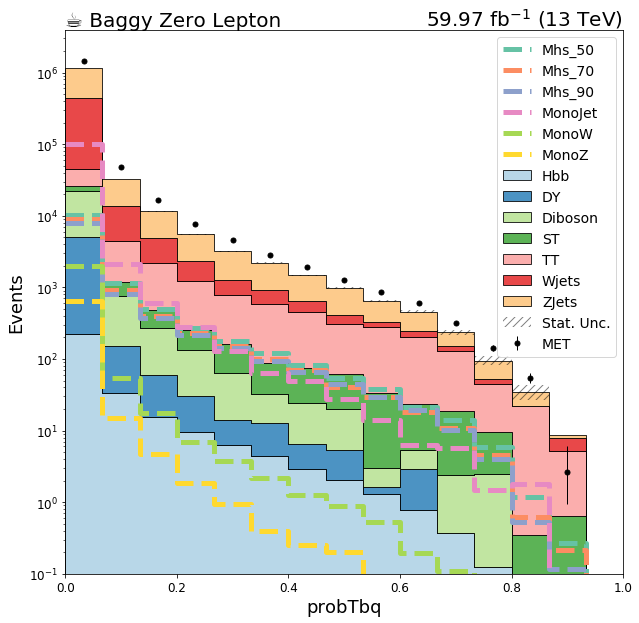

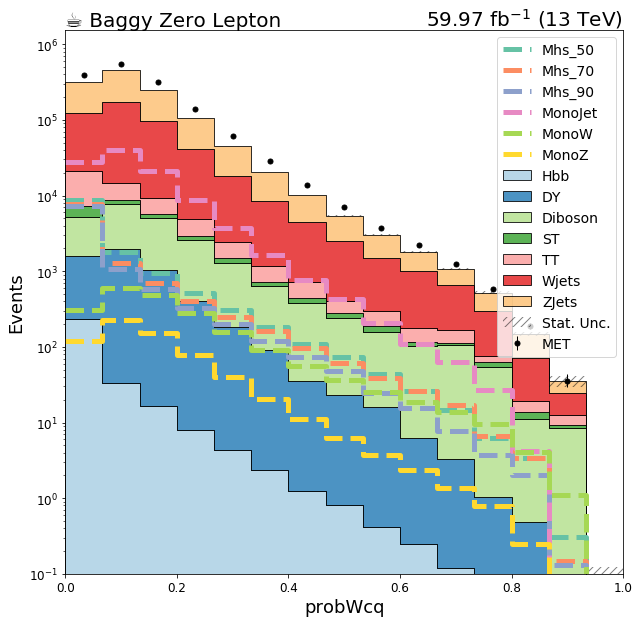

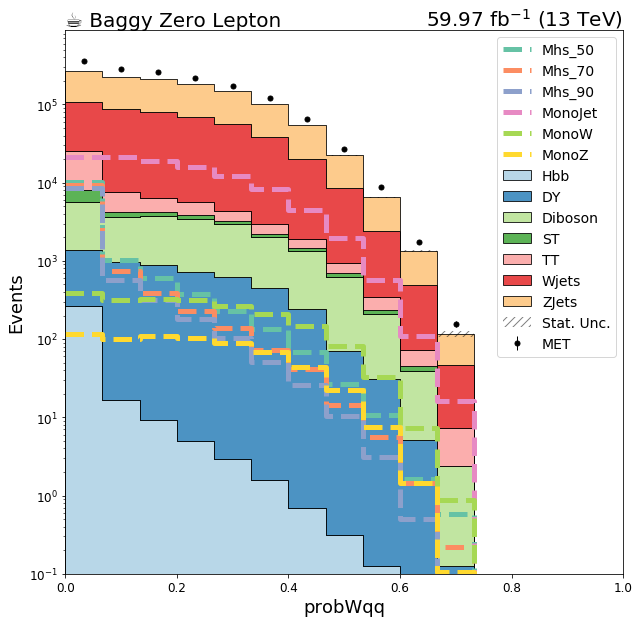

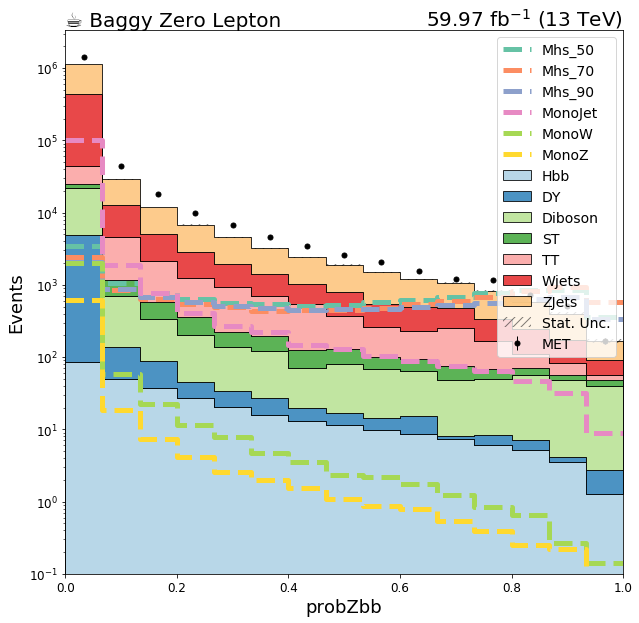

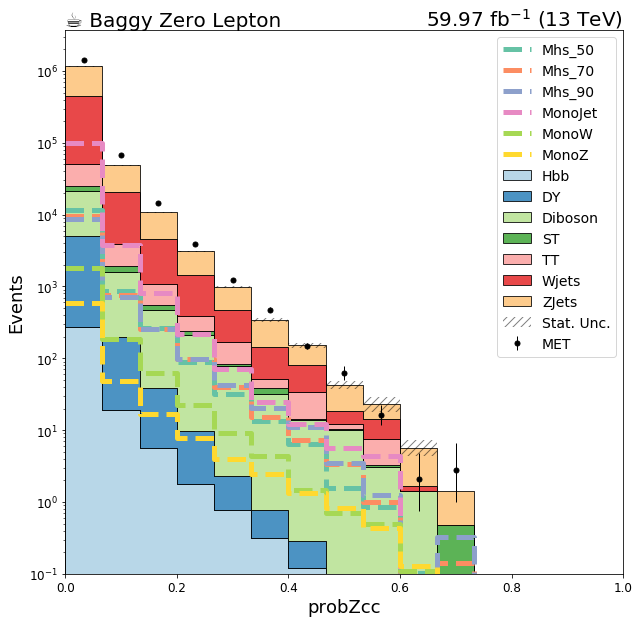

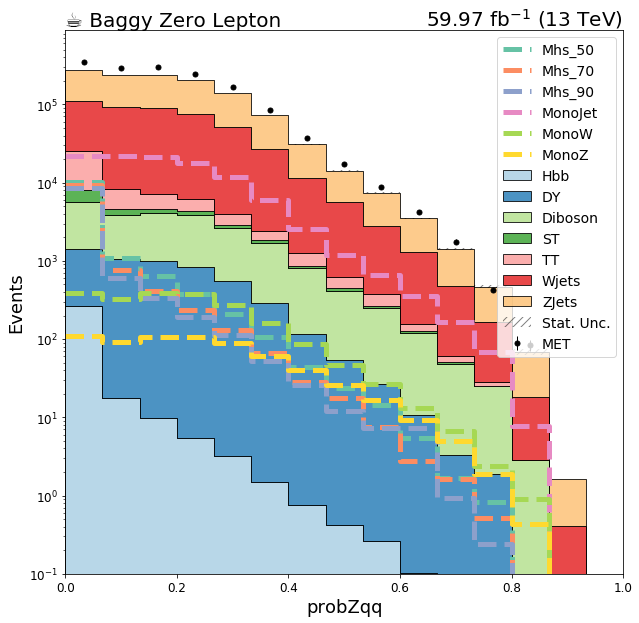

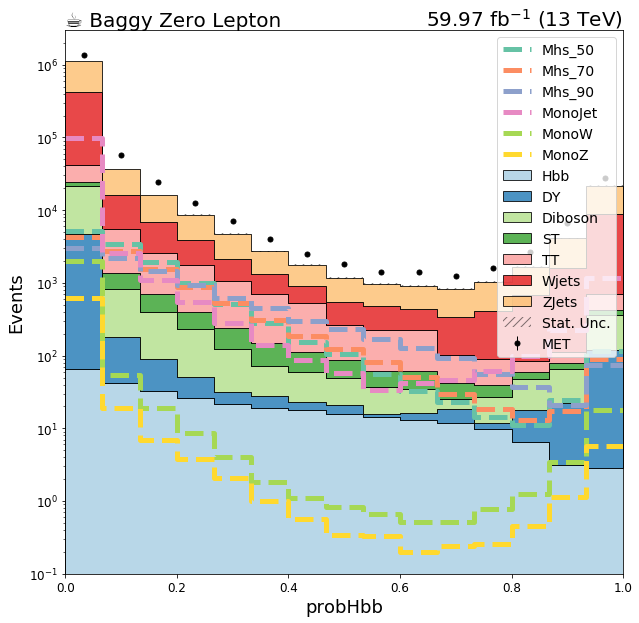

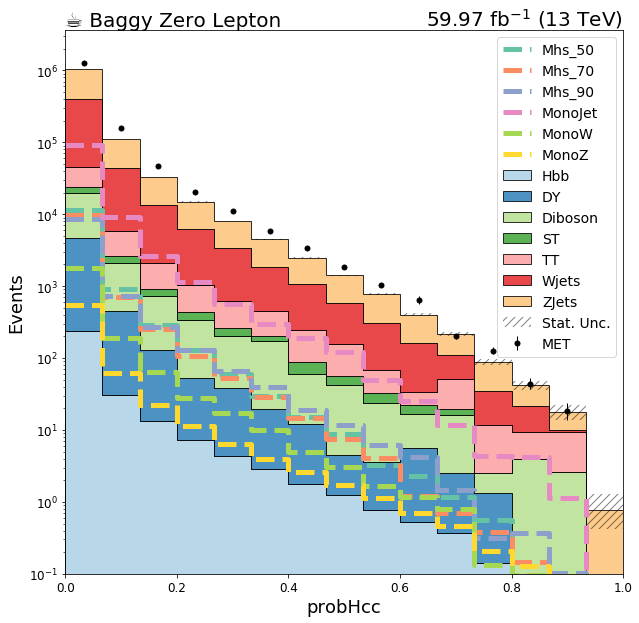

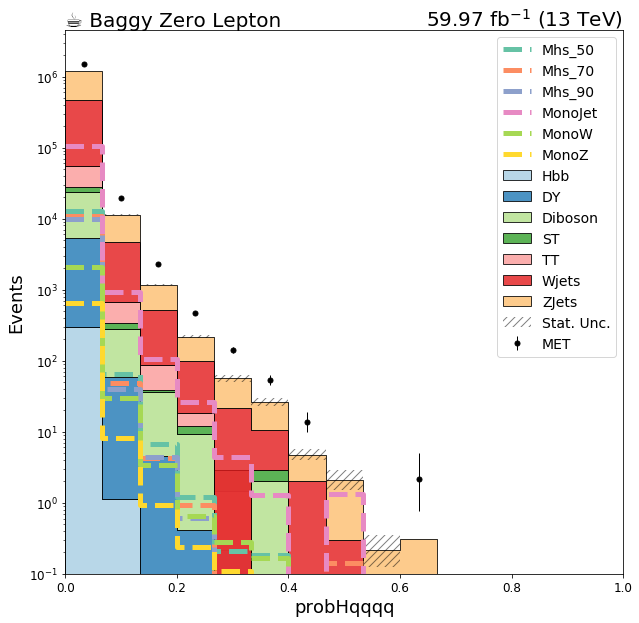

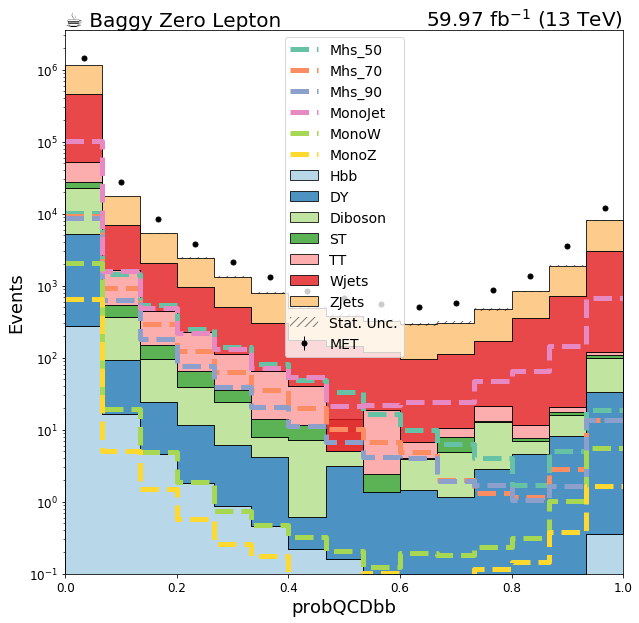

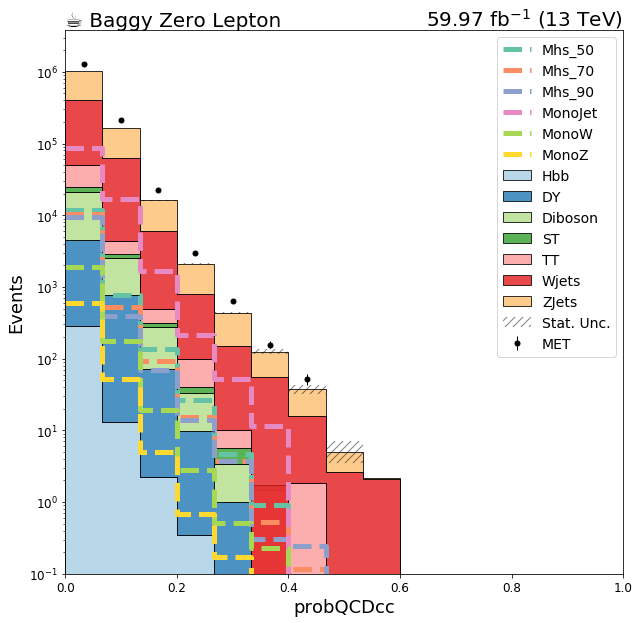

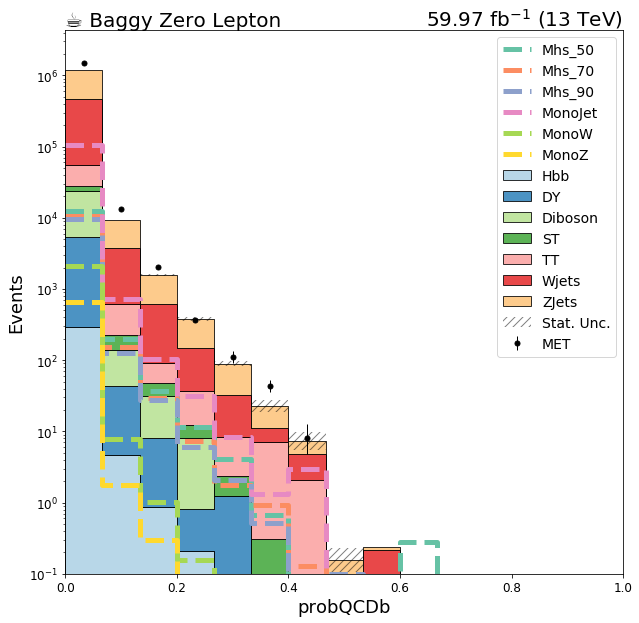

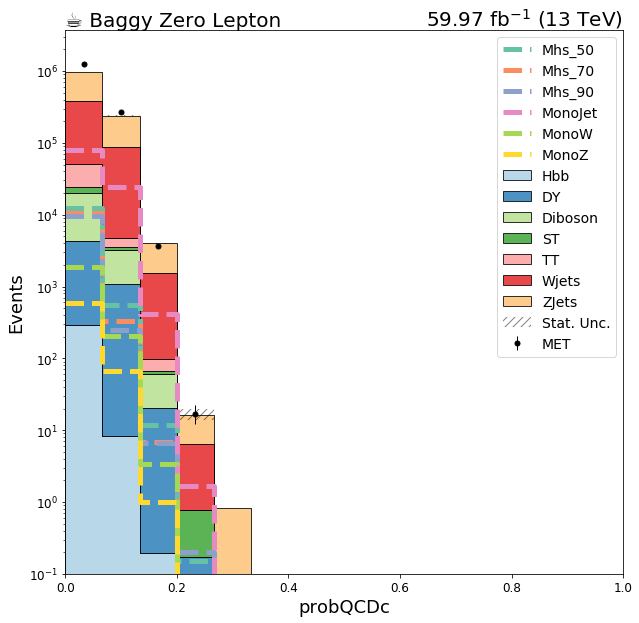

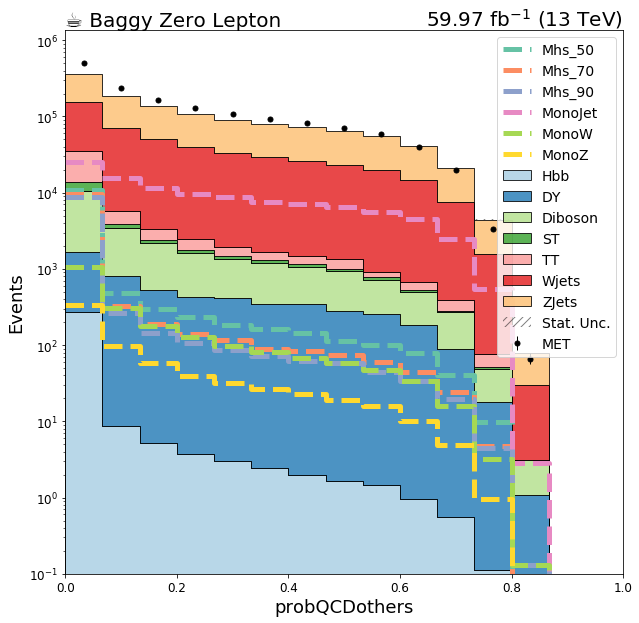

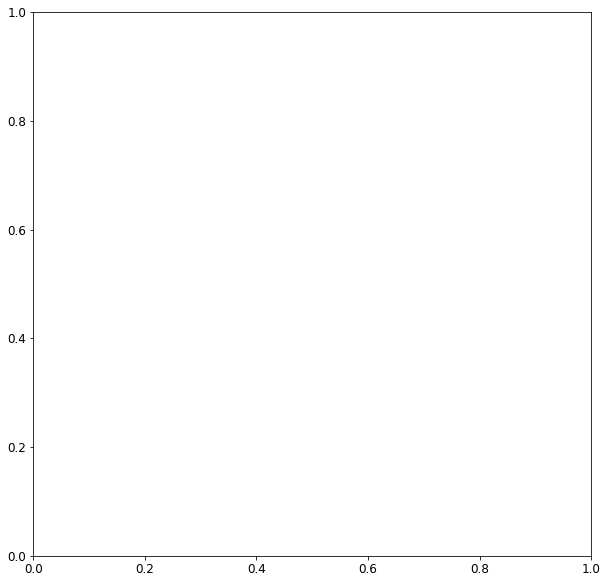

In [14]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
#colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in data_hists.keys():
    if key=='sumw': continue
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(data_hists[key].integrate('jet_selection','baggy').integrate('region','iszeroL'),            
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
               )
    plot.plot1d(bkg_hists[key].integrate('jet_selection','baggy').integrate('region','iszeroL'),
            overlay="process",
            ax=ax,
            clear=False,
            stack=True,
            #line_opts={'linestyle':'none', 'label':'_', 'alpha': 0.},
            #line_opts={'linestyle':'-','color':'k','label':'_'},
            fill_opts=fill_opts,
            error_opts=error_opts
               )
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    plot.plot1d(signal_hists[key].integrate('jet_selection','baggy').integrate('region','iszeroL'), 
                ax=ax, overlay="process", clear=False, stack=False, line_opts=args)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Baggy Zero Lepton", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('stack') 
    plot_name = 'stack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

ValueError: plot1d() can only support up to two dimensions (one for axis, one to stack or overlay)

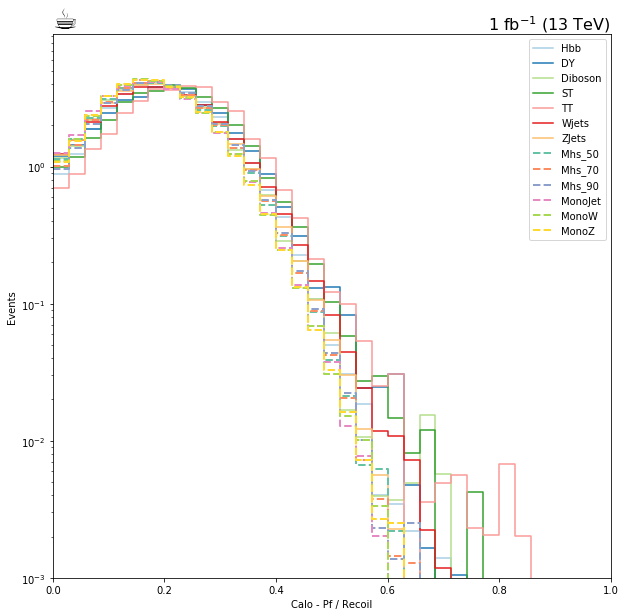

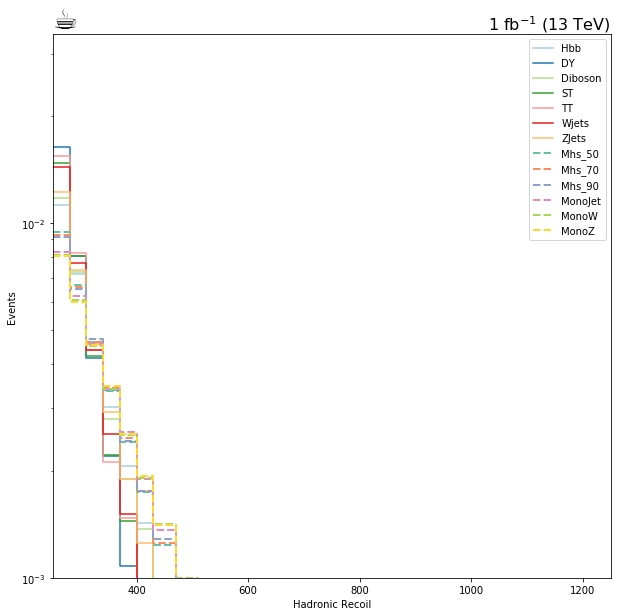

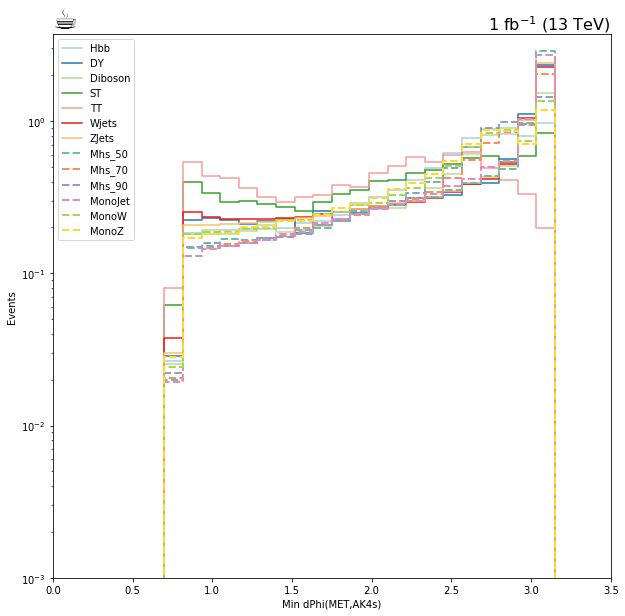

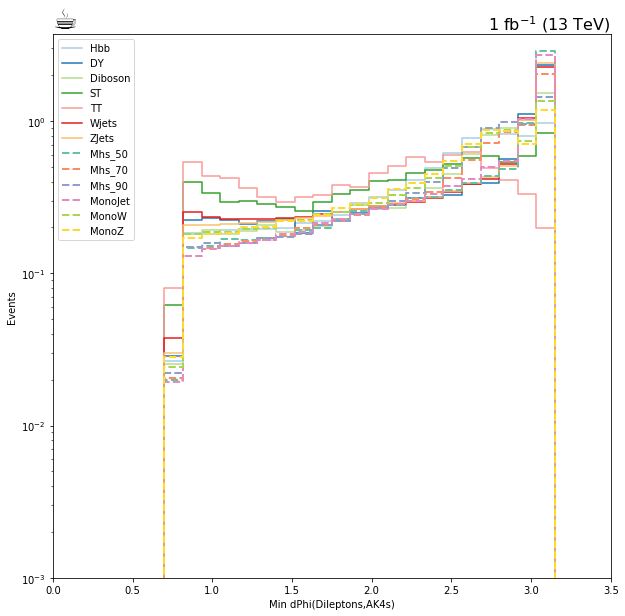

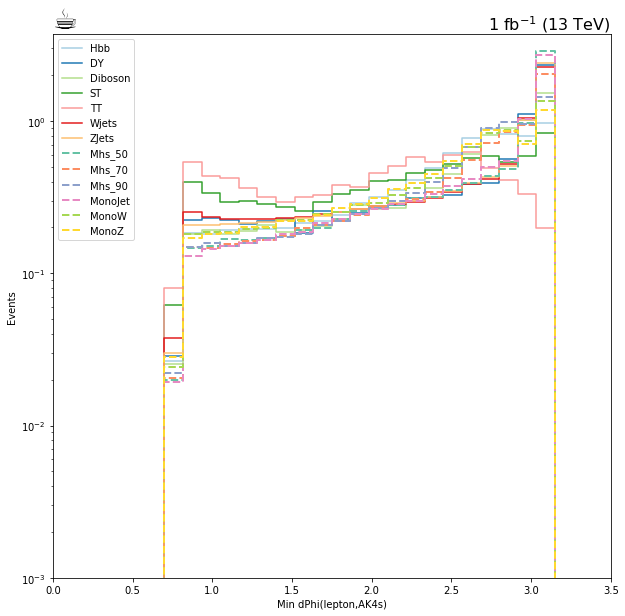

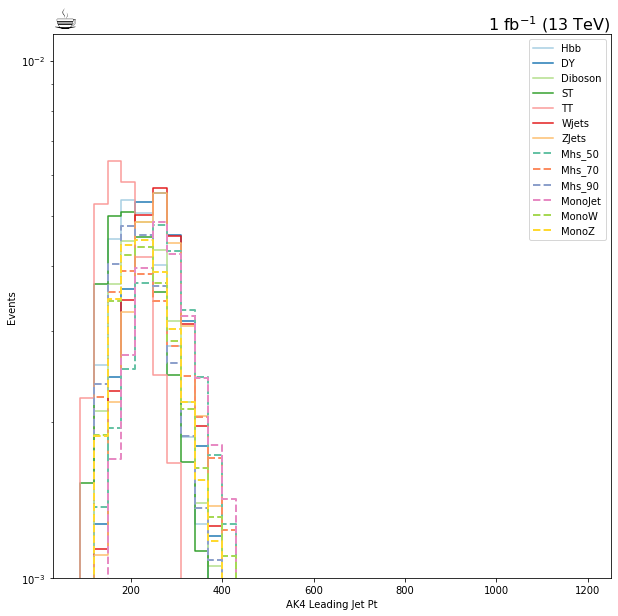

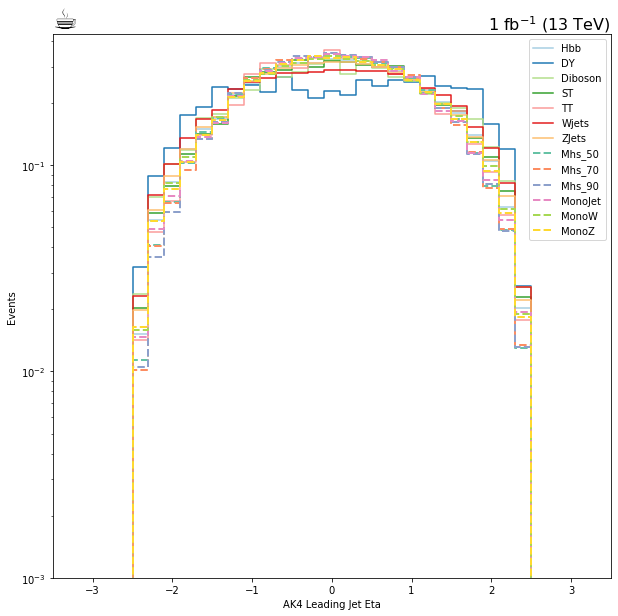

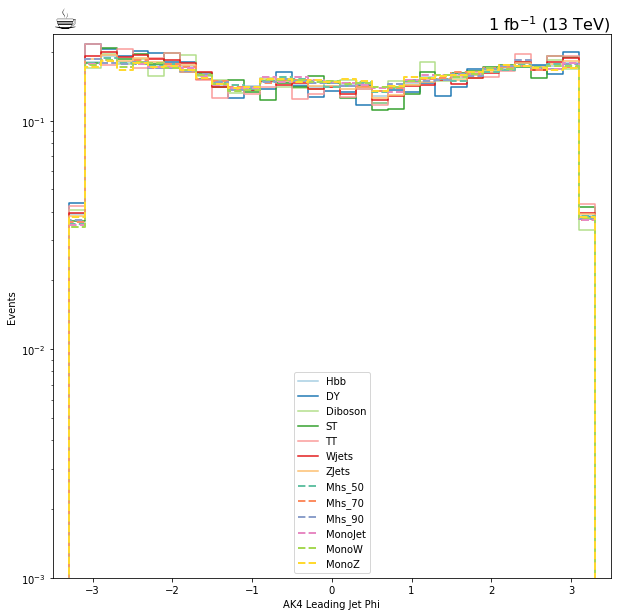

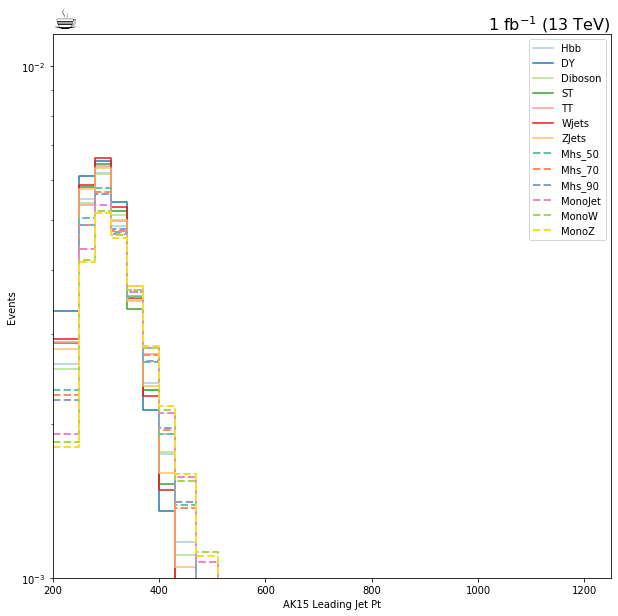

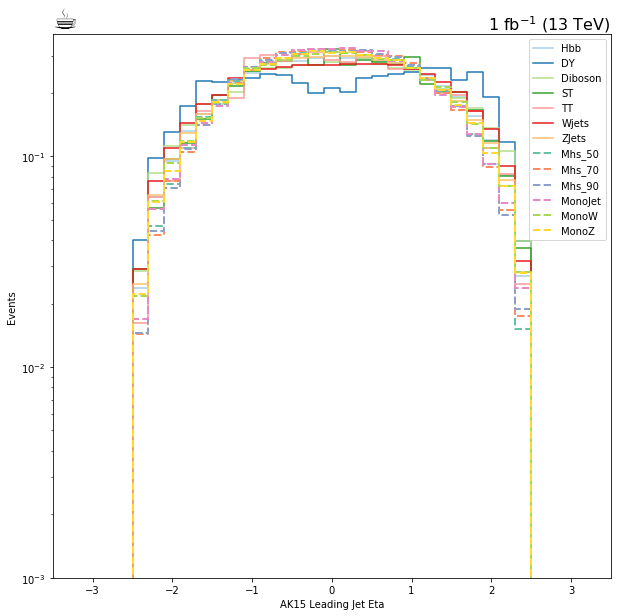

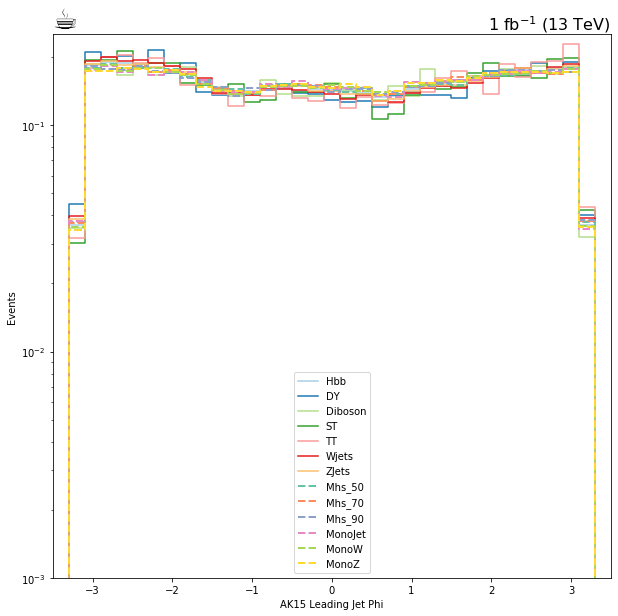

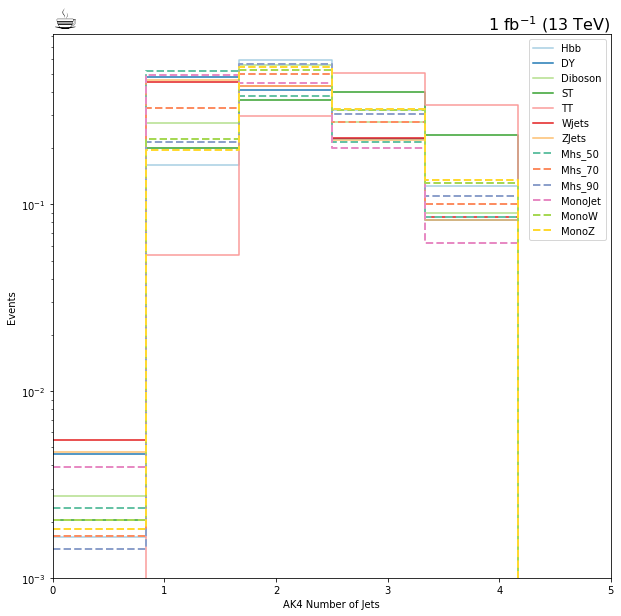

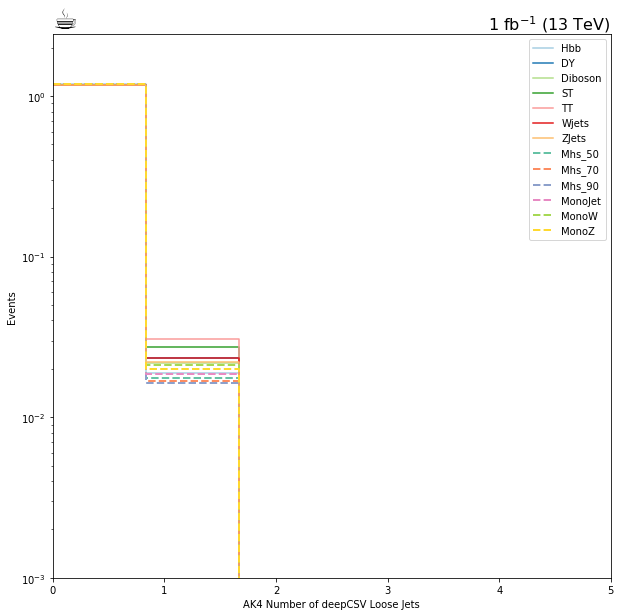

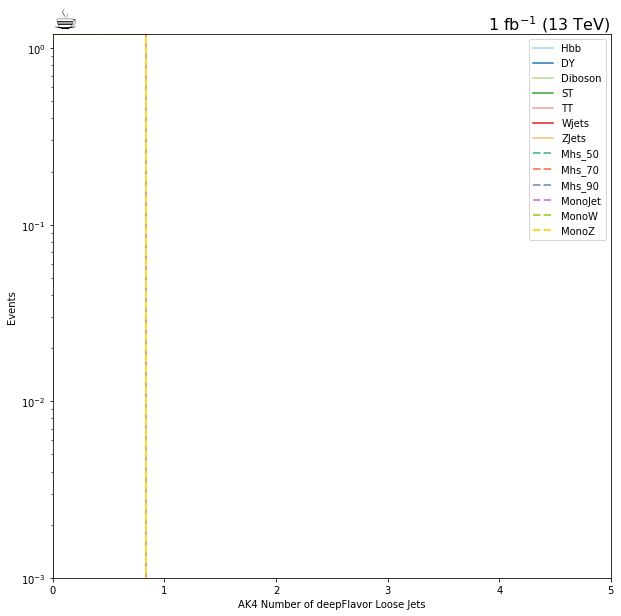

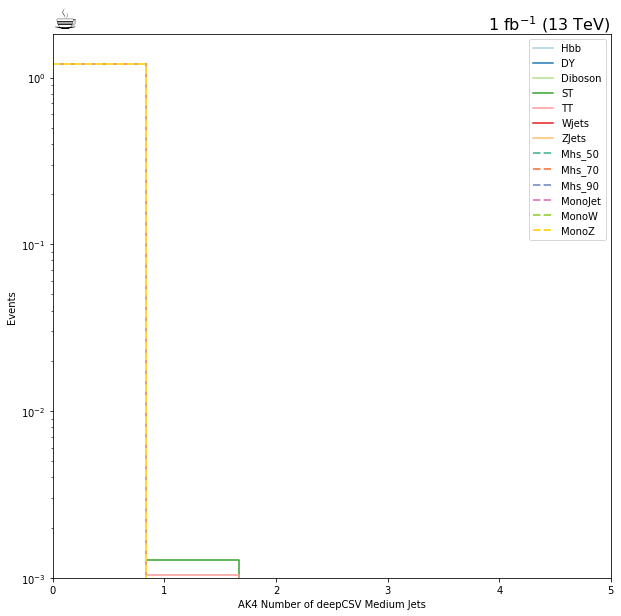

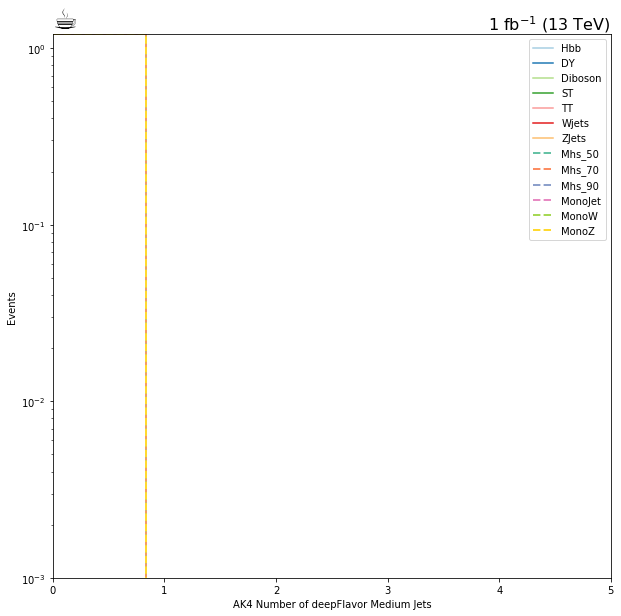

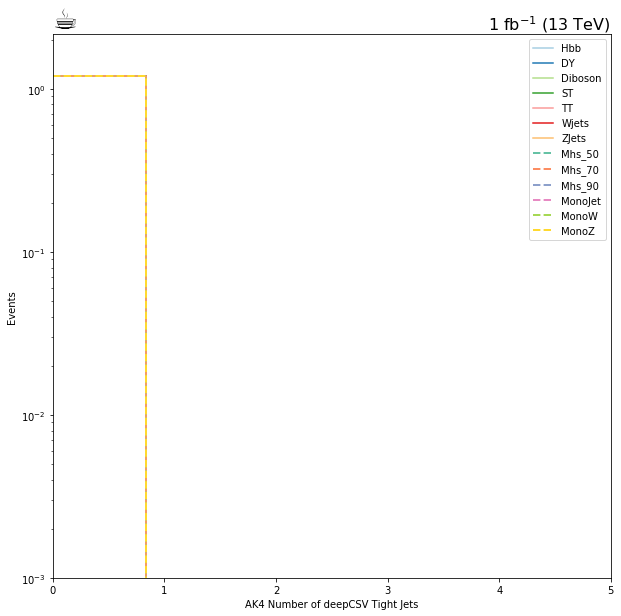

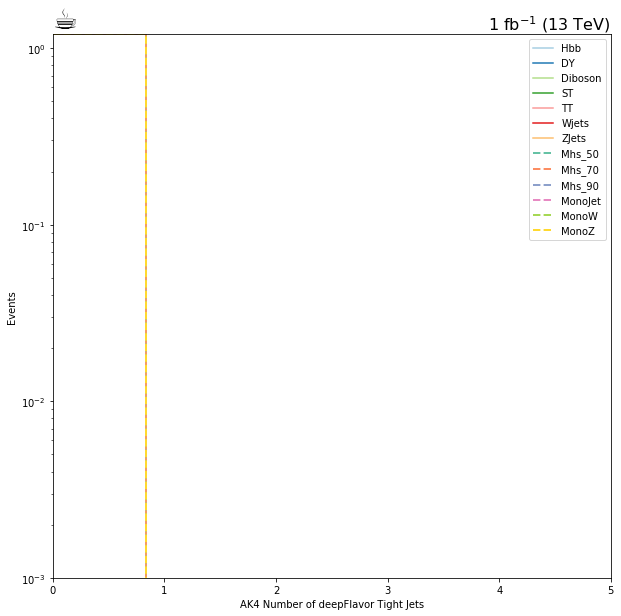

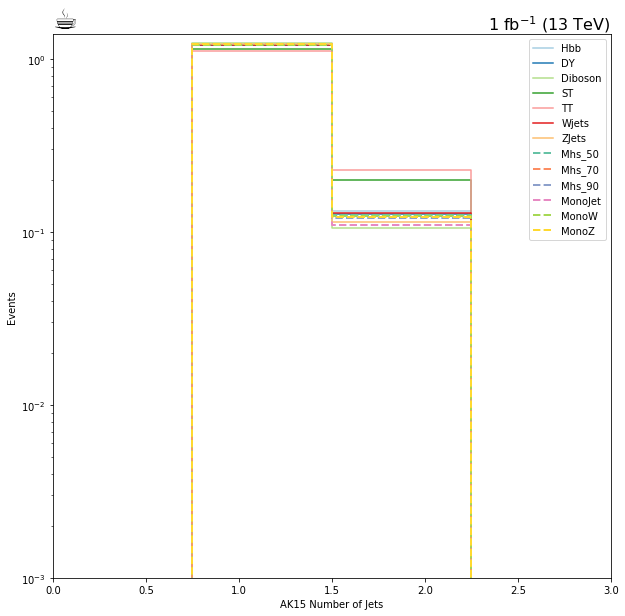

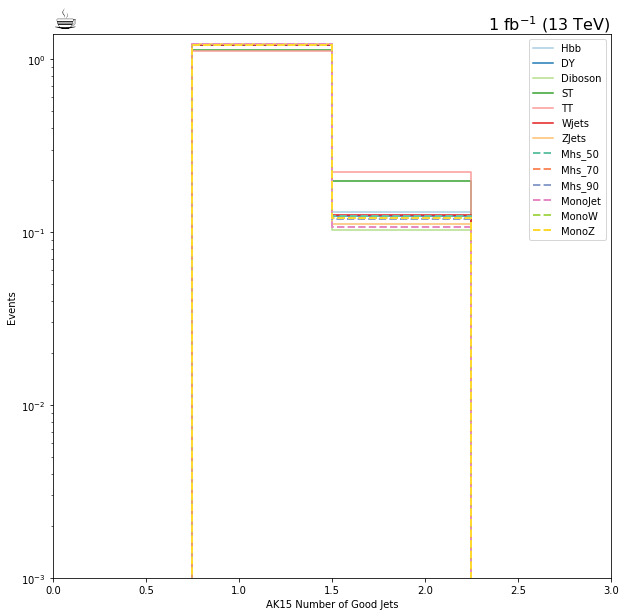

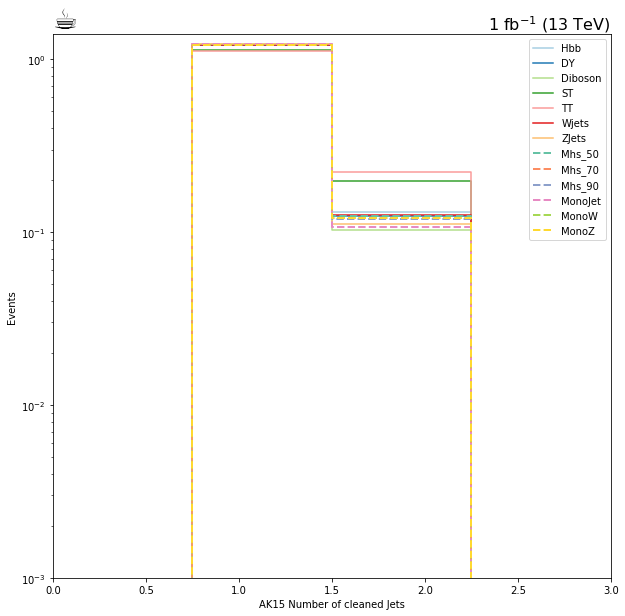

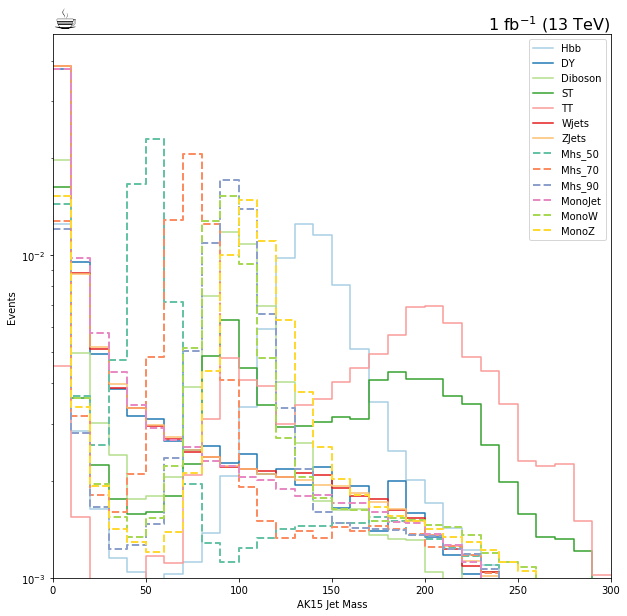

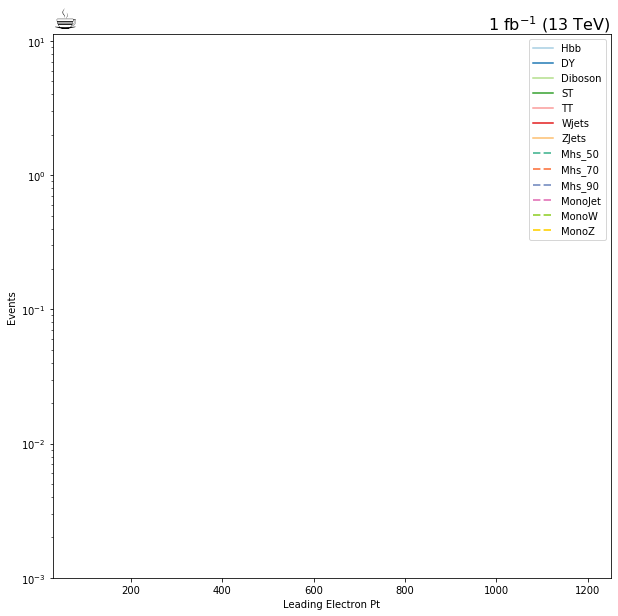

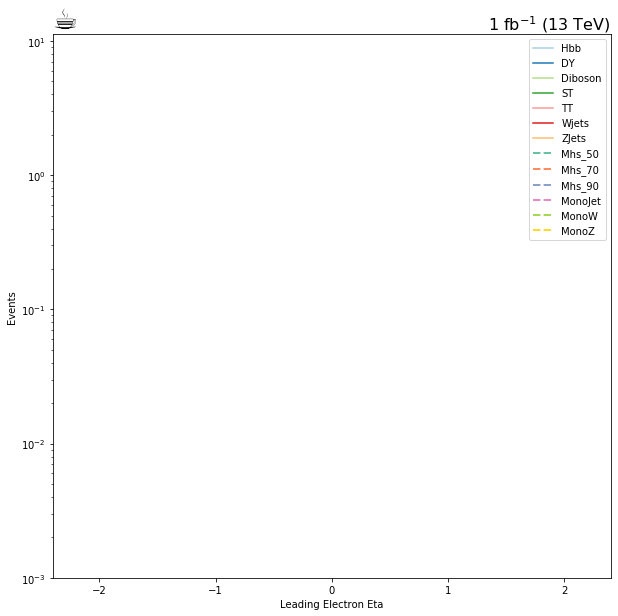

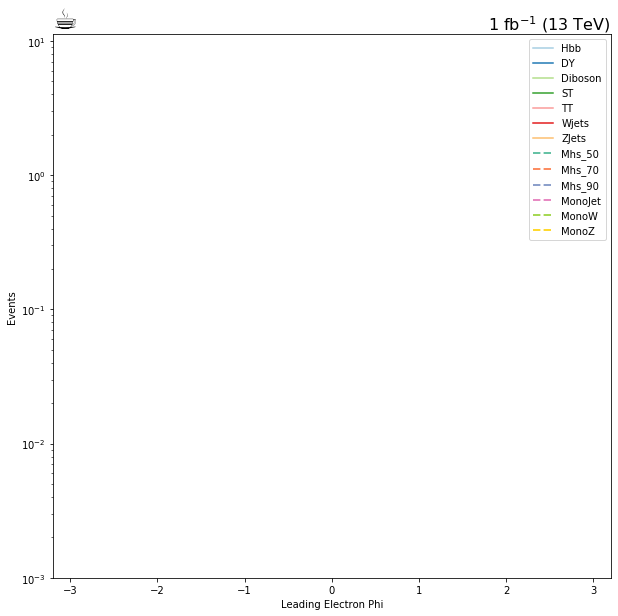

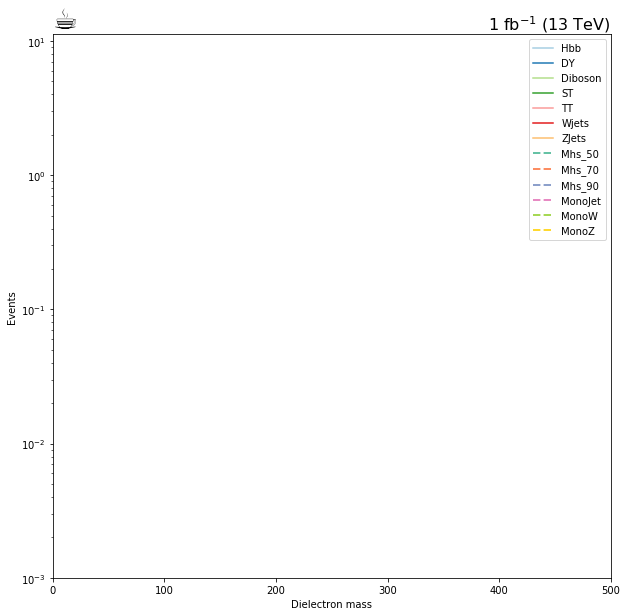

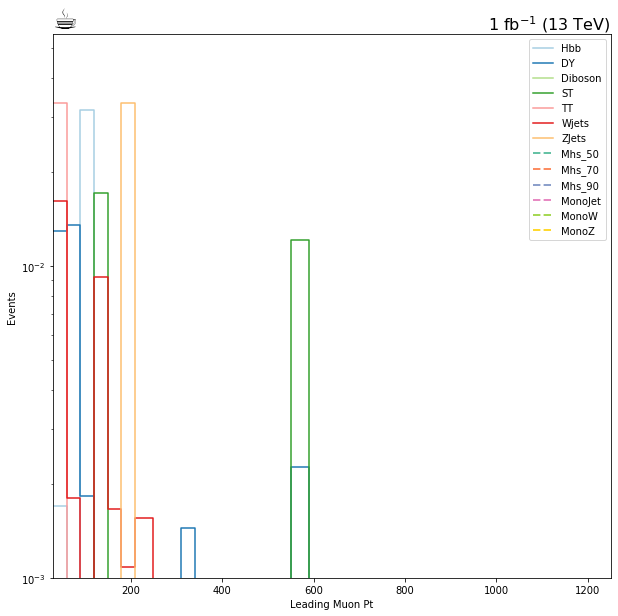

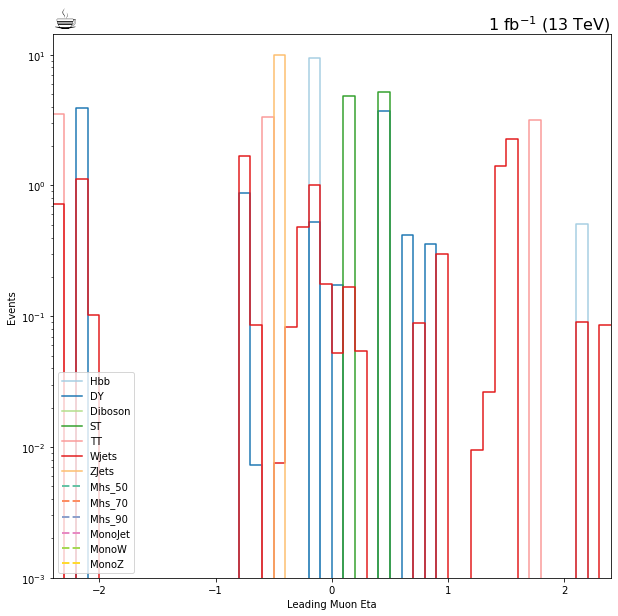

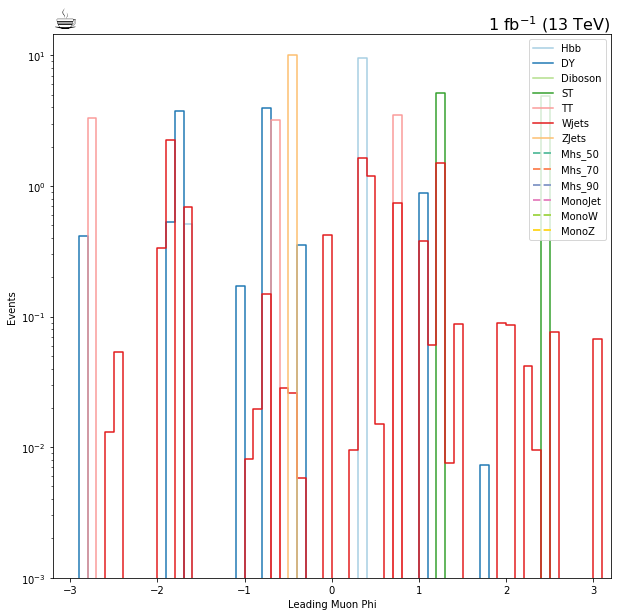

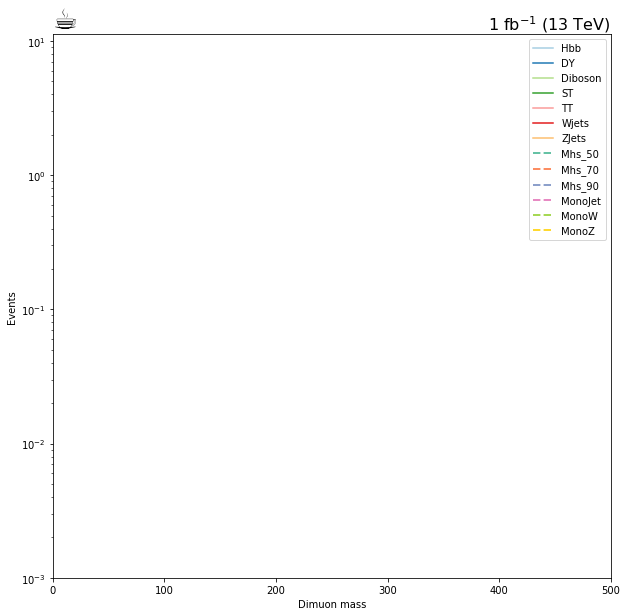

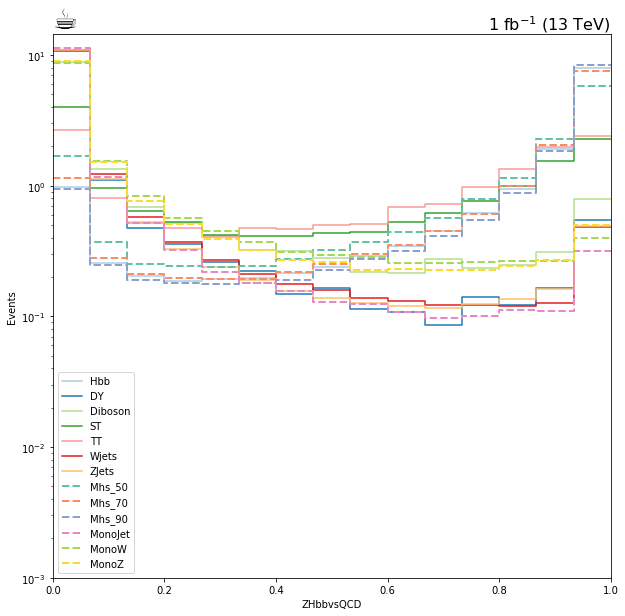

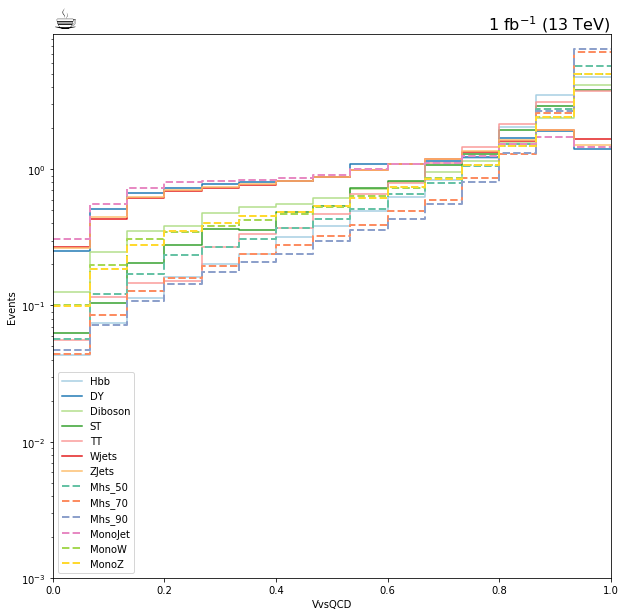

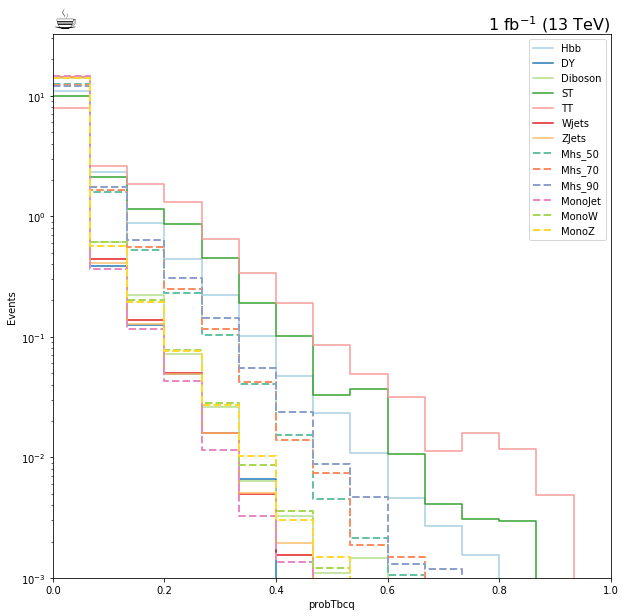

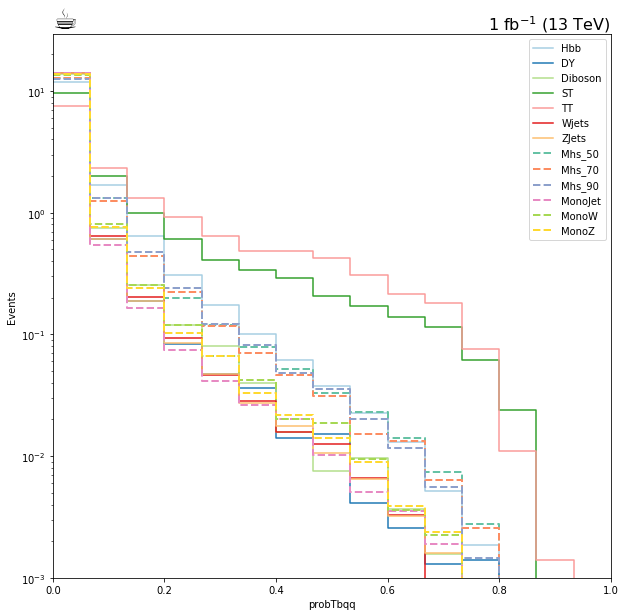

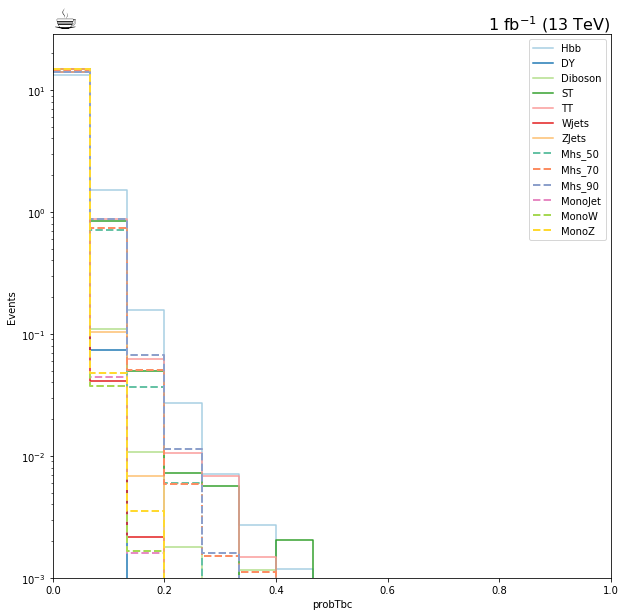

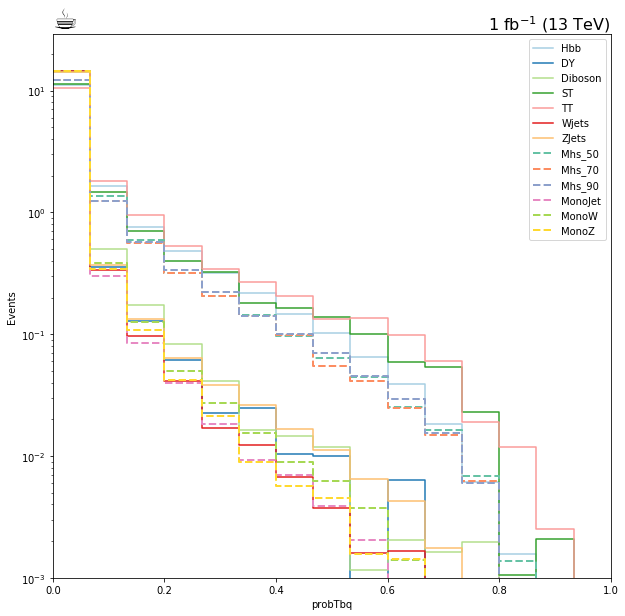

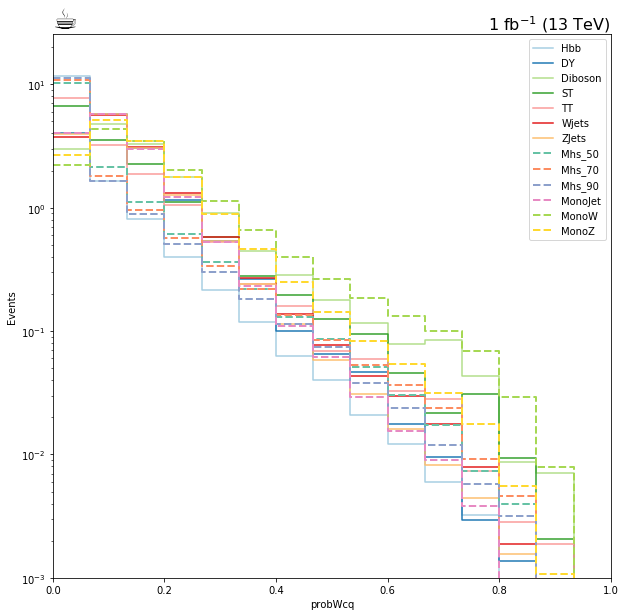

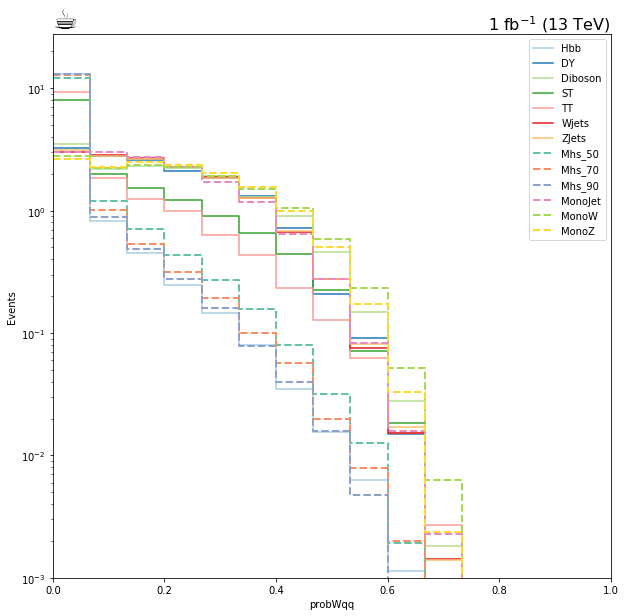

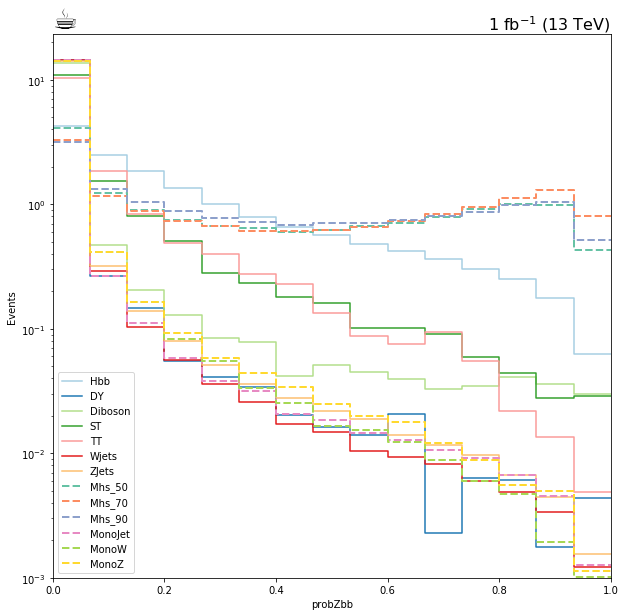

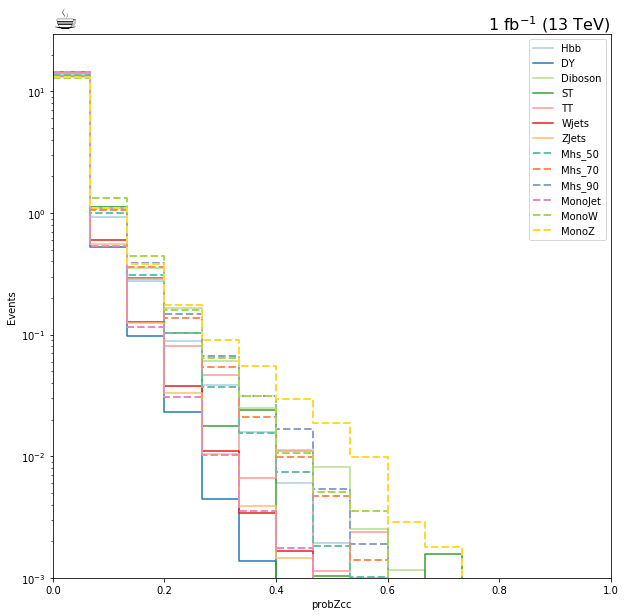

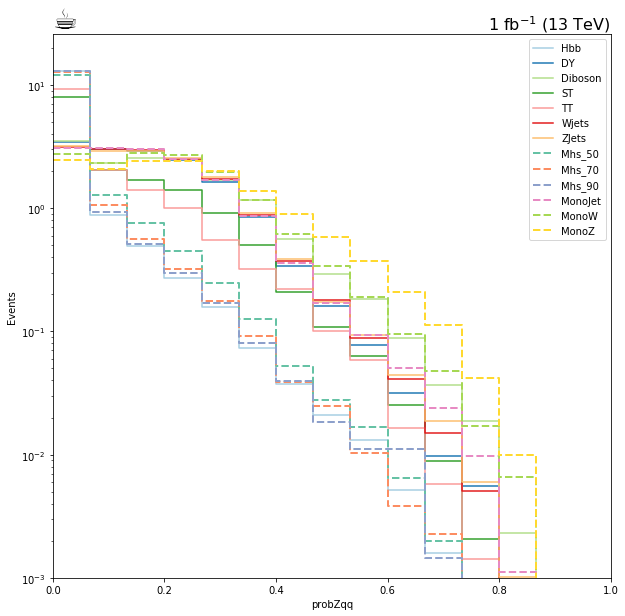

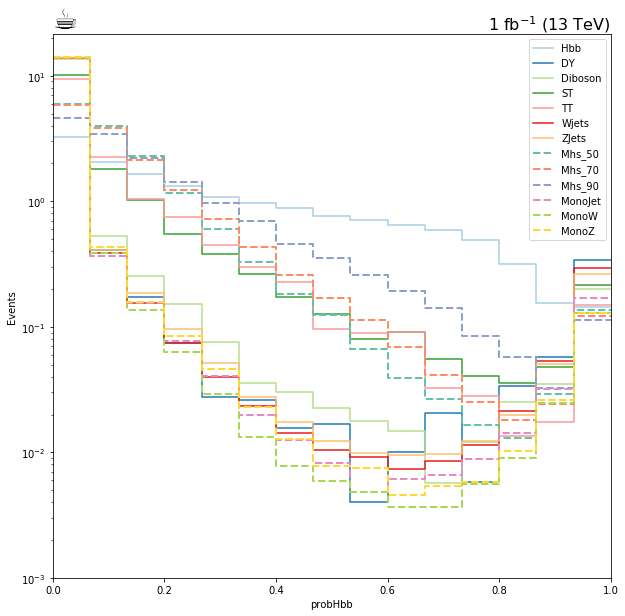

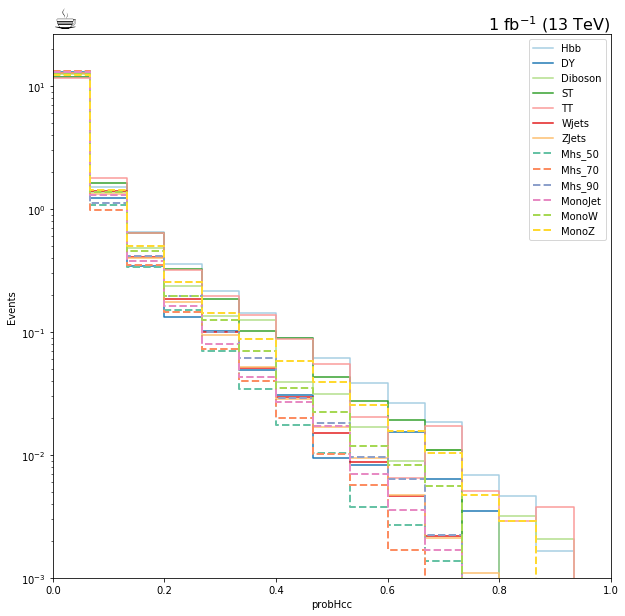

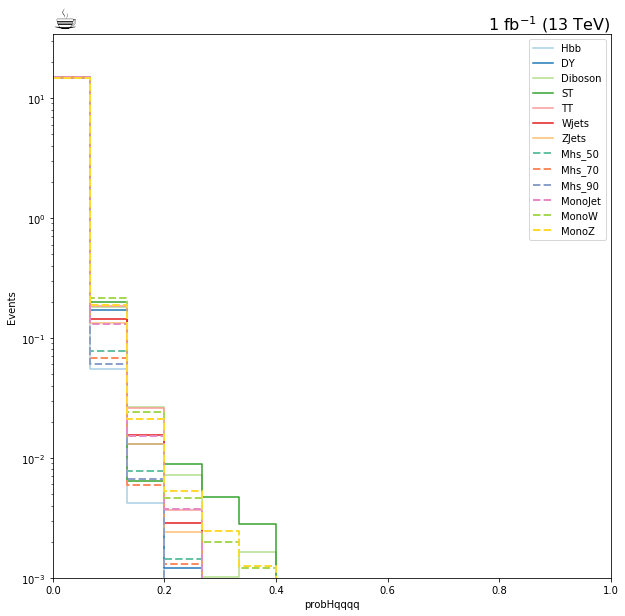

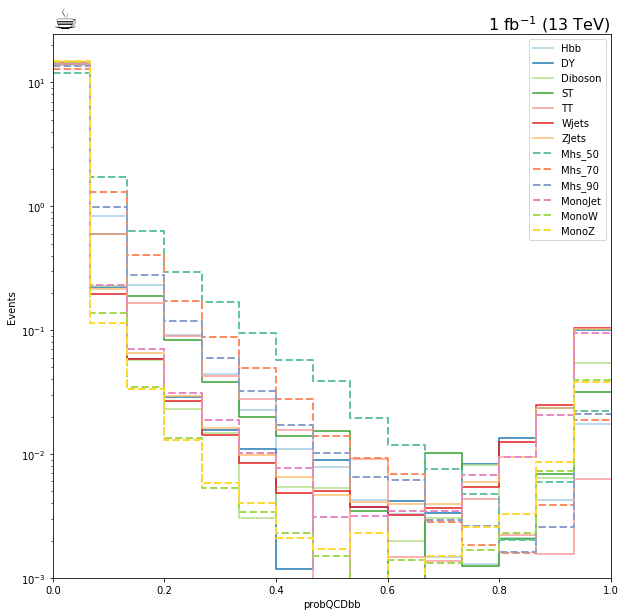

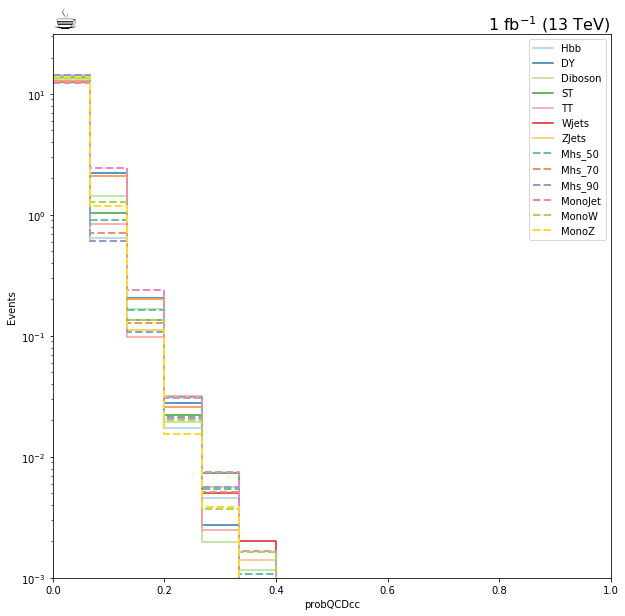

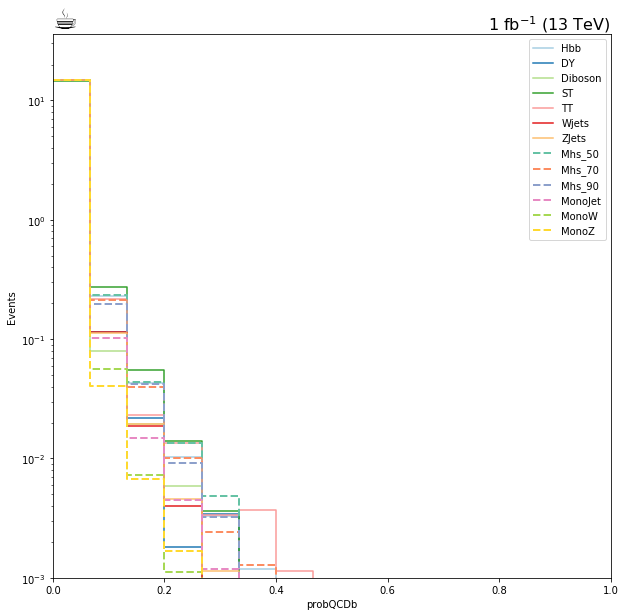

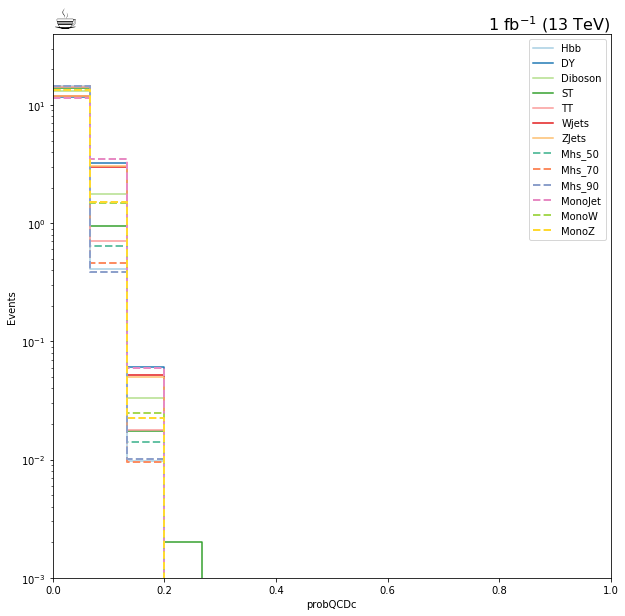

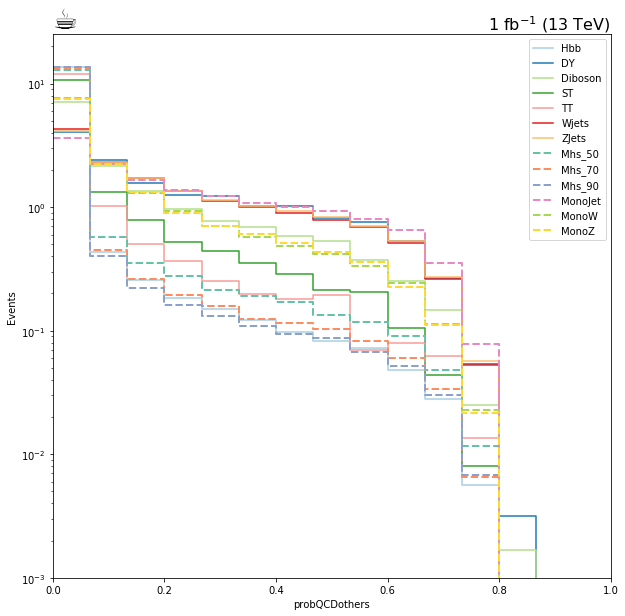

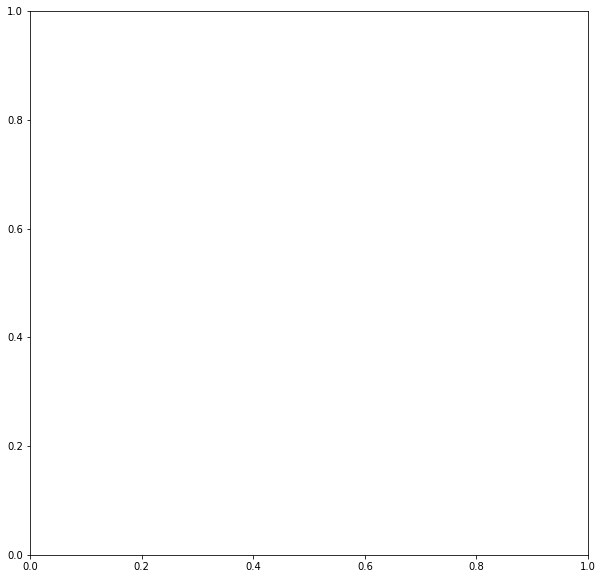

In [21]:
from cycler import cycler
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']


if not os.path.exists('unstack'):
    os.makedirs('unstack')


for key in bkg_hists.keys():
    if key=='sumw': continue
    
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(bkg_hists[key].integrate('jet_selection','baggy').integrate('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    plot.plot1d(signal_hists[key].integrate('jet_selection','baggy').integrate('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts=args,density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.001, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('unstack')
    plot_name = 'unstack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))